## Project Name: House Prices: Advanced Regression Techniques

##### Problem Statement ##############

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement
 ceiling or the proximity to an east-west railroad.But this playground competition's dataset proves that 
much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, 
this competition challenges you to predict the final price of each home.


**The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead**

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
##3 Importing libraries

import pandas as pd ## data preprocessing 
import numpy as np  ## mathmatical calculation
import matplotlib.pyplot as plt 
import seaborn as sns

pd.pandas.set_option('display.max_columns' , None)

In [2]:
# fffffffffff

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
train.shape

(1460, 81)

In [6]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [7]:
test.shape

(1459, 80)

In [8]:
df_train = pd.concat([train, test])
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [9]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [10]:
df_train.shape

(2919, 81)

## EDA and Feature Engineering

In [11]:
duplicate = df_train[df_train.duplicated()]
duplicate

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [12]:
print(duplicate)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [13]:
df_train.duplicated().sum()

0

In [14]:
df_train.iloc[1450:1470,:]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1451         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
5            Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
6            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
7            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
8            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
9            Lvl    AllPub    Corner       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1450       Norm   Duplex     2Story            5            5       1974   
1451       Norm     1Fam     1Story            8            5       2008   
1452       Norm   TwnhsE       SLvl            5            5       2005   
1453       Norm     1Fam     1Story            5            5       2006   
1454       Norm     1Fam     1Story            7            5       2004   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Sto

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [16]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

### Handling numerical  Missing values

**1. For Continious**

In [17]:
len(df_train.columns.unique()), df_train.columns.unique()

(81,
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garag

In [18]:
missing_values_continious = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) > 20 and df_train[feature].isnull().sum()>0]
missing_values_continious

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea',
 'SalePrice']

In [19]:
len(df_train["LotFrontage"].unique())

129

In [20]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
missing_values_continious = []
for feature in df_train.columns:
    if df_train[feature].dtype != "object" and len(df_train[feature].unique())>20:
        missing_values_continious.append(feature)
missing_values_continious    

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [22]:
df_train['LotFrontage'].isnull().sum()

486

In [23]:
df_train['LotFrontage'].isnull().mean()*100

16.649537512846866

In [24]:
for feature in missing_values_continious:
    print(f'{feature} = {df_train[feature].isnull().mean() * 100} %')

Id = 0.0 %
LotFrontage = 16.649537512846866 %
LotArea = 0.0 %
YearBuilt = 0.0 %
YearRemodAdd = 0.0 %
MasVnrArea = 0.7879410757108599 %
BsmtFinSF1 = 0.0342583076396026 %
BsmtFinSF2 = 0.0342583076396026 %
BsmtUnfSF = 0.0342583076396026 %
TotalBsmtSF = 0.0342583076396026 %
1stFlrSF = 0.0 %
2ndFlrSF = 0.0 %
LowQualFinSF = 0.0 %
GrLivArea = 0.0 %
GarageYrBlt = 5.4470709146968135 %
GarageArea = 0.0342583076396026 %
WoodDeckSF = 0.0 %
OpenPorchSF = 0.0 %
EnclosedPorch = 0.0 %
3SsnPorch = 0.0 %
ScreenPorch = 0.0 %
MiscVal = 0.0 %
SalePrice = 49.9828708461802 %


In [25]:
for feature in missing_values_continious:
    print(f'{feature} = {round(df_train[feature].isnull().mean() , 2) * 100} %')

Id = 0.0 %
LotFrontage = 17.0 %
LotArea = 0.0 %
YearBuilt = 0.0 %
YearRemodAdd = 0.0 %
MasVnrArea = 1.0 %
BsmtFinSF1 = 0.0 %
BsmtFinSF2 = 0.0 %
BsmtUnfSF = 0.0 %
TotalBsmtSF = 0.0 %
1stFlrSF = 0.0 %
2ndFlrSF = 0.0 %
LowQualFinSF = 0.0 %
GrLivArea = 0.0 %
GarageYrBlt = 5.0 %
GarageArea = 0.0 %
WoodDeckSF = 0.0 %
OpenPorchSF = 0.0 %
EnclosedPorch = 0.0 %
3SsnPorch = 0.0 %
ScreenPorch = 0.0 %
MiscVal = 0.0 %
SalePrice = 50.0 %


In [26]:
median_value = df_train["GarageYrBlt"].median()

In [27]:
median_value

1979.0

In [28]:
for feature in missing_values_continious:
    if feature == "SalePrice":
        pass
    else:        
        median_value = df_train[feature].median()
        df_train[feature].fillna(median_value,inplace=True)    

In [29]:
for feature in missing_values_continious:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

Id 0.0
LotFrontage 0.0
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
MiscVal 0.0
SalePrice 49.980000000000004


In [30]:
df_train.shape

(2919, 81)

In [31]:
df_train.drop("Id" , inplace=True , axis = 1)

In [32]:
df_train.shape

(2919, 80)

**2. For Descrete**

In [33]:
missing_values_descrete = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) < 20 and df_train[feature].isnull().sum()>0]
missing_values_descrete

['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']

In [34]:
missing_values_descrete = []
for feature in df_train.columns:
    if df_train[feature].dtype != "object" and len(df_train[feature].unique()) <=20:
        missing_values_descrete.append(feature)
len(missing_values_descrete)        

15

In [35]:
for feature in missing_values_descrete:
    print(f' {feature} = {df_train[feature].isnull().mean()*100} %')

 MSSubClass = 0.0 %
 OverallQual = 0.0 %
 OverallCond = 0.0 %
 BsmtFullBath = 0.0685166152792052 %
 BsmtHalfBath = 0.0685166152792052 %
 FullBath = 0.0 %
 HalfBath = 0.0 %
 BedroomAbvGr = 0.0 %
 KitchenAbvGr = 0.0 %
 TotRmsAbvGrd = 0.0 %
 Fireplaces = 0.0 %
 GarageCars = 0.0342583076396026 %
 PoolArea = 0.0 %
 MoSold = 0.0 %
 YrSold = 0.0 %


In [36]:
for feature in missing_values_descrete:
    print(f' {feature} = {round(df_train[feature].isnull().mean(),4)*100} %')

 MSSubClass = 0.0 %
 OverallQual = 0.0 %
 OverallCond = 0.0 %
 BsmtFullBath = 0.06999999999999999 %
 BsmtHalfBath = 0.06999999999999999 %
 FullBath = 0.0 %
 HalfBath = 0.0 %
 BedroomAbvGr = 0.0 %
 KitchenAbvGr = 0.0 %
 TotRmsAbvGrd = 0.0 %
 Fireplaces = 0.0 %
 GarageCars = 0.03 %
 PoolArea = 0.0 %
 MoSold = 0.0 %
 YrSold = 0.0 %


In [37]:
df_train["GarageCars"].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [38]:
df_train["GarageCars"].mode()

0    2.0
Name: GarageCars, dtype: float64

In [39]:
df_train["GarageCars"].mode()[0]

2.0

In [40]:
for feature in missing_values_descrete:
    mode_value = df_train[feature].mode()[0]
    df_train[feature].fillna(mode_value,inplace=True)

In [41]:
for feature in missing_values_descrete:
    print(f' {feature} = {round(df_train[feature].isnull().mean(),4)*100} %')

 MSSubClass = 0.0 %
 OverallQual = 0.0 %
 OverallCond = 0.0 %
 BsmtFullBath = 0.0 %
 BsmtHalfBath = 0.0 %
 FullBath = 0.0 %
 HalfBath = 0.0 %
 BedroomAbvGr = 0.0 %
 KitchenAbvGr = 0.0 %
 TotRmsAbvGrd = 0.0 %
 Fireplaces = 0.0 %
 GarageCars = 0.0 %
 PoolArea = 0.0 %
 MoSold = 0.0 %
 YrSold = 0.0 %


### Handling categorical missing values

In [42]:
missing_values_c = [feature for feature in df_train.columns if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0]
missing_values_c

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [43]:
missing_values_c = []
for feature in df_train.columns:
    if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0:
        missing_values_c.append(feature)
len(missing_values_c)        

23

In [44]:
for feature in missing_values_c:
    print(f' {feature} = {round(df_train[feature].isnull().mean(),4)*100} %')

 MSZoning = 0.13999999999999999 %
 Alley = 93.22 %
 Utilities = 0.06999999999999999 %
 Exterior1st = 0.03 %
 Exterior2nd = 0.03 %
 MasVnrType = 0.8200000000000001 %
 BsmtQual = 2.77 %
 BsmtCond = 2.81 %
 BsmtExposure = 2.81 %
 BsmtFinType1 = 2.71 %
 BsmtFinType2 = 2.74 %
 Electrical = 0.03 %
 KitchenQual = 0.03 %
 Functional = 0.06999999999999999 %
 FireplaceQu = 48.65 %
 GarageType = 5.38 %
 GarageFinish = 5.45 %
 GarageQual = 5.45 %
 GarageCond = 5.45 %
 PoolQC = 99.66000000000001 %
 Fence = 80.44 %
 MiscFeature = 96.39999999999999 %
 SaleType = 0.03 %


In [45]:
df_train['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
for feature in missing_values_c:
    mode_value = df_train[feature].mode()[0]
    df_train[feature].fillna(mode_value,inplace=True)    
df_train.drop(["Alley" ,"PoolQC", "Fence", "MiscFeature", "FireplaceQu" ] , axis = 1 , inplace = True)

In [47]:
pd.pandas.set_option('display.max_rows' , None)

In [48]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [49]:
df_train.shape

(2919, 75)

In [50]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

### Handling year feature

In [51]:
year = [feature for feature in df_train.columns if "Yr" in feature or "Year" in feature] 
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [52]:
year = []
for feature in df_train.columns:
    if "Yr" in feature or "Year" in feature:
        year.append(feature)
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [53]:
for feature in year:
    print(f' {feature}    >>>>   len of data: {len(df_train[feature].unique())}    >>>> {df_train[feature].dtype}')

 YearBuilt    >>>>   len of data: 118    >>>> int64
 YearRemodAdd    >>>>   len of data: 61    >>>> int64
 GarageYrBlt    >>>>   len of data: 103    >>>> float64
 YrSold    >>>>   len of data: 5    >>>> int64


In [54]:
df_train["YrSold"].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

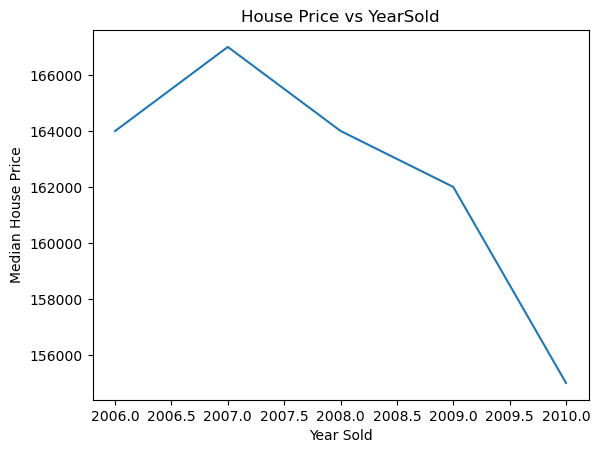

In [55]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
plt.show()

In [56]:
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [57]:
df_train[year].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [58]:
for feature in year:       
    df_train[feature] = df_train['YrSold']-df_train[feature]
df_train.drop("YrSold", axis = 1 , inplace = True)

In [59]:
df_train.shape

(2919, 74)

In [60]:
df_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [61]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd          5.0   
1          TA             6        Typ           1     Attchd         31.0   
2          Gd             6        Typ           1     Attchd          7.0   
3          Gd          

### Handling continious values

In [62]:
continious = [feature for feature in df_train.columns if len(df_train[feature].unique())>20 and df_train[feature].dtype != "O" and feature not in year]
continious

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [63]:
continious = []
for feature in df_train.columns:
     if df_train[feature].dtype != "O" and len(df_train[feature].unique())>20  and feature not in year:
            continious.append(feature)
continious         

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [64]:
df_train["LotFrontage"].skew()

1.6757127932619122

In [65]:
import warnings
warnings.filterwarnings('ignore')

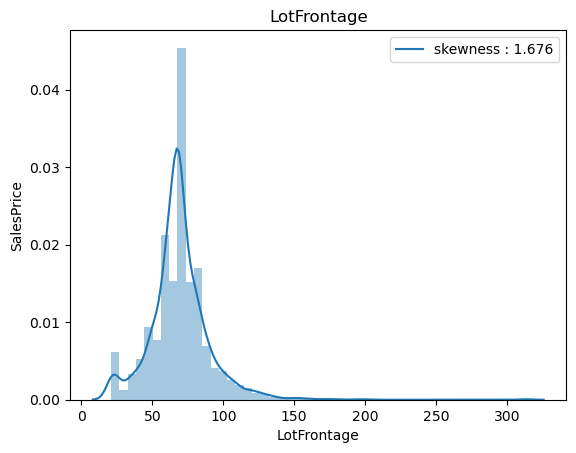

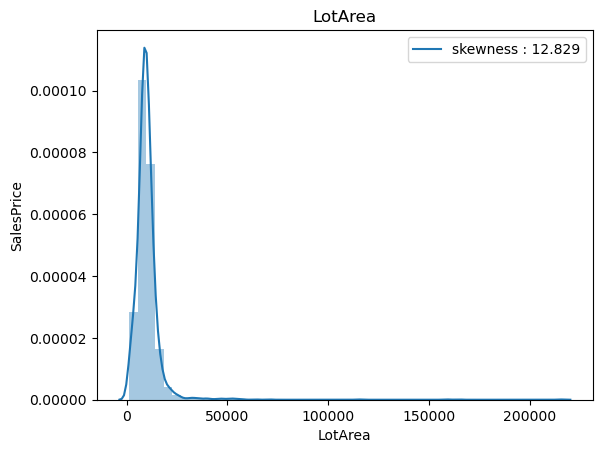

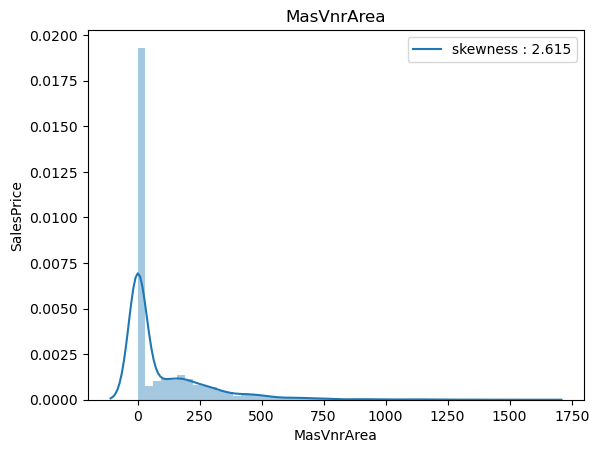

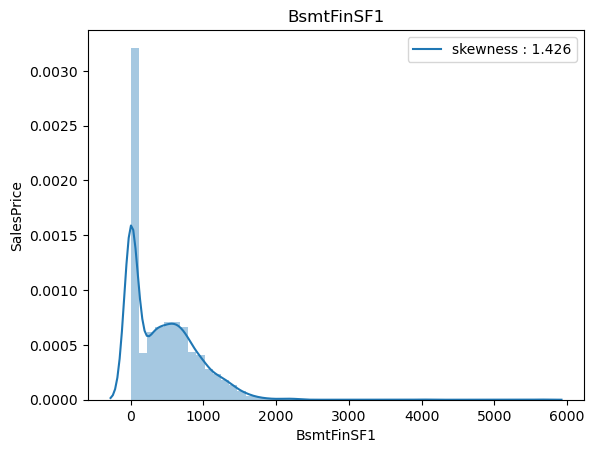

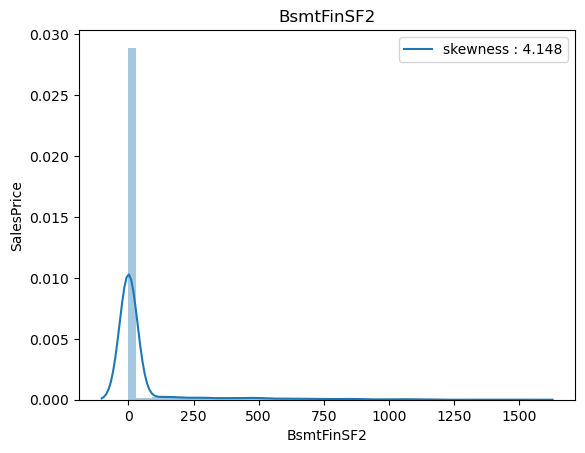

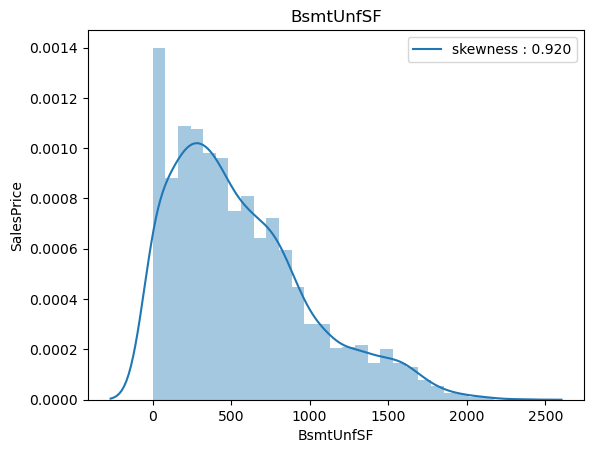

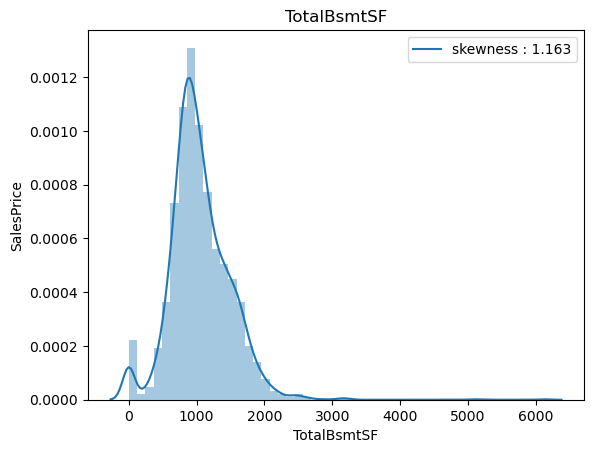

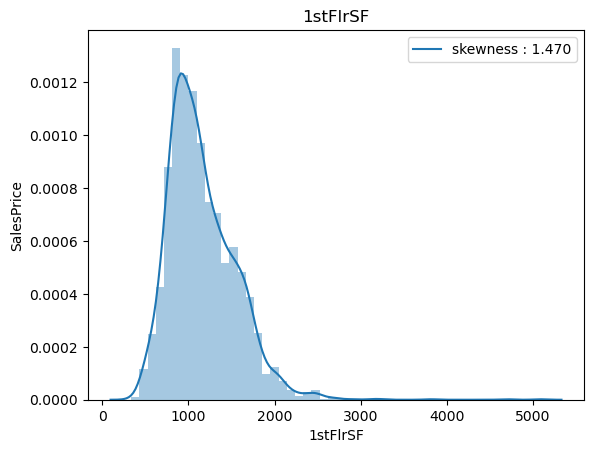

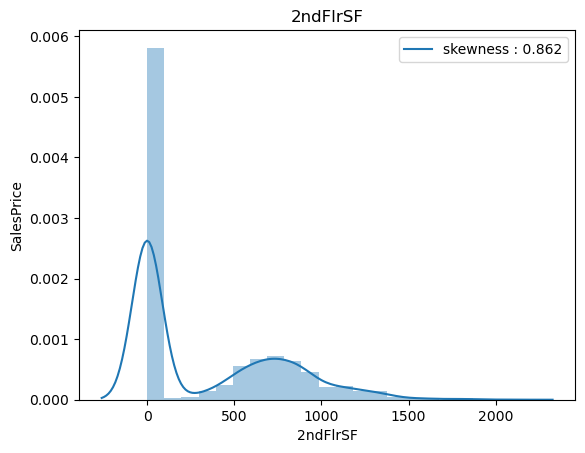

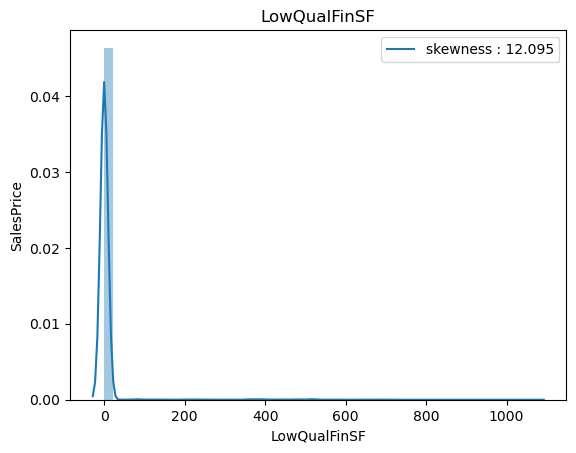

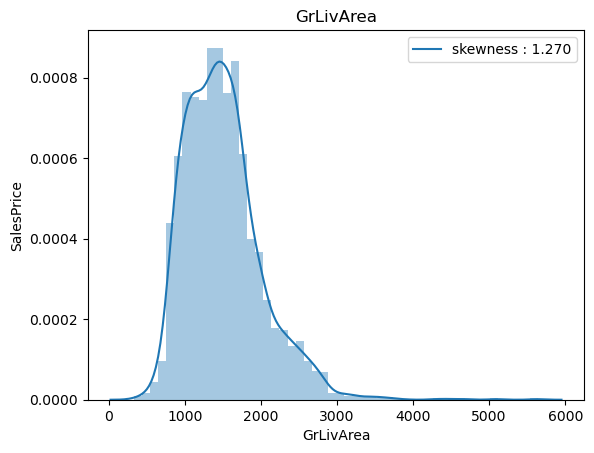

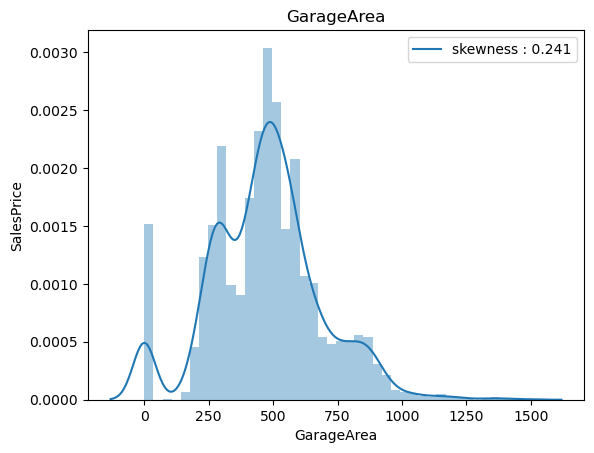

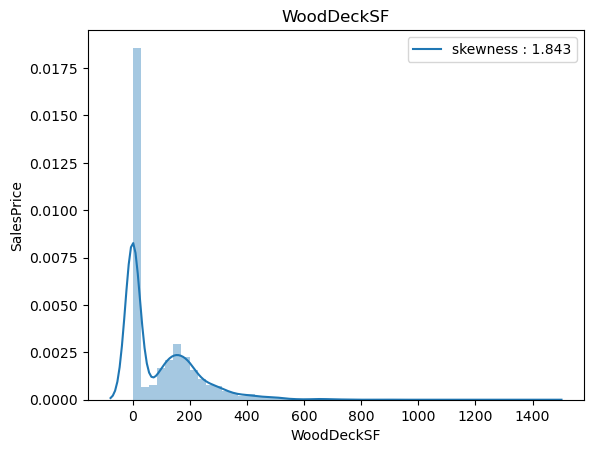

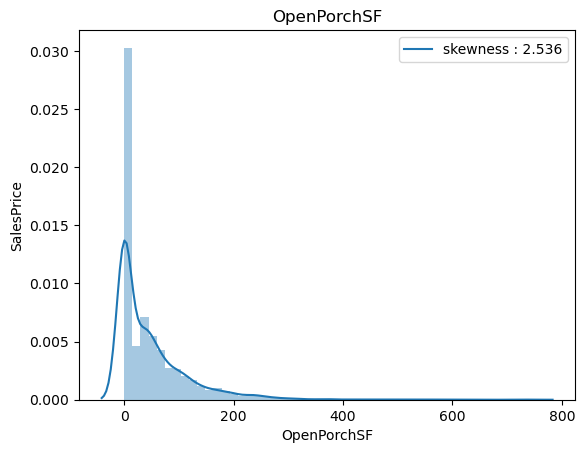

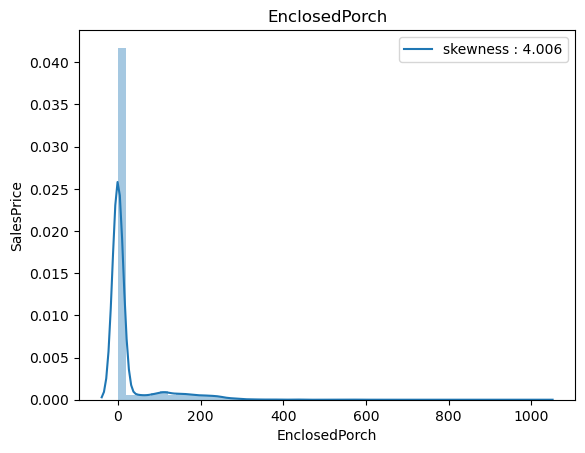

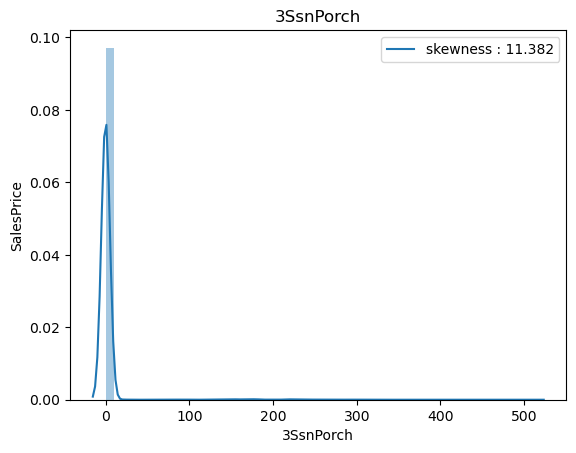

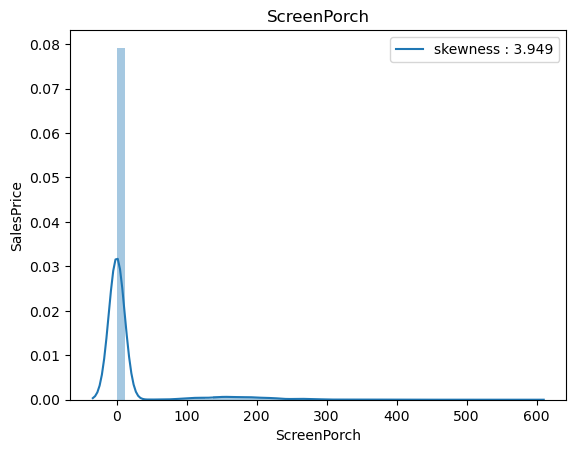

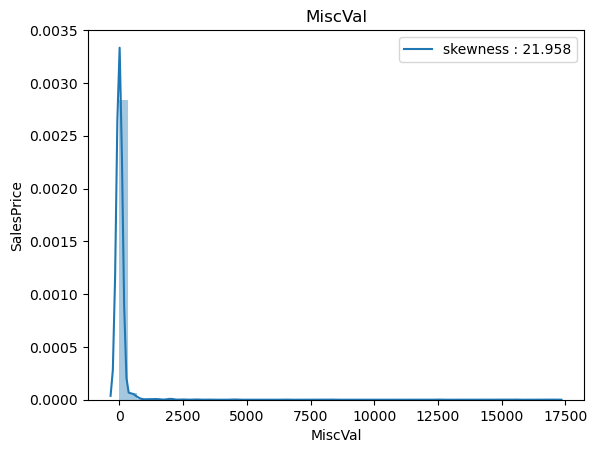

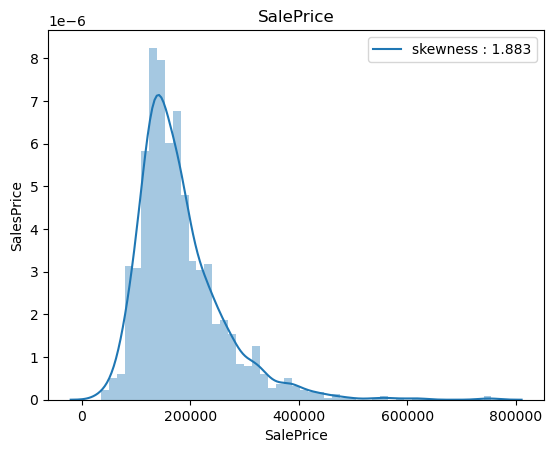

In [66]:
## We will be using logarithmic transformation
for feature in continious:
    data = df_train.copy()
    #data[feature]=np.log1p(data[feature])
    ax = sns.distplot(data[feature])
    ax.legend(["skewness : {:0.3f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show() 

In [67]:
skewed = [feature for feature in continious if data[feature].skew()<1]
skewed

['BsmtUnfSF', '2ndFlrSF', 'GarageArea']

In [68]:
skewed = []
for feature in continious:
    if abs(df_train[feature].skew())>1:
        skewed.append(feature)
skewed        

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [69]:
abs(-5)

5

In [70]:
for feature in continious:
    if feature == "SalePrice":
        pass
    else:        
        df_train[feature] = np.log1p(df_train[feature])

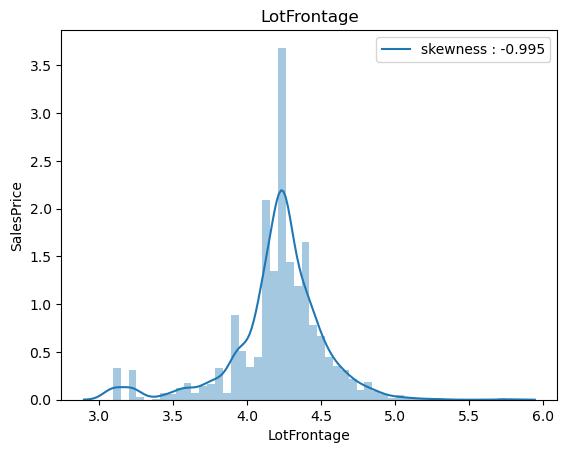

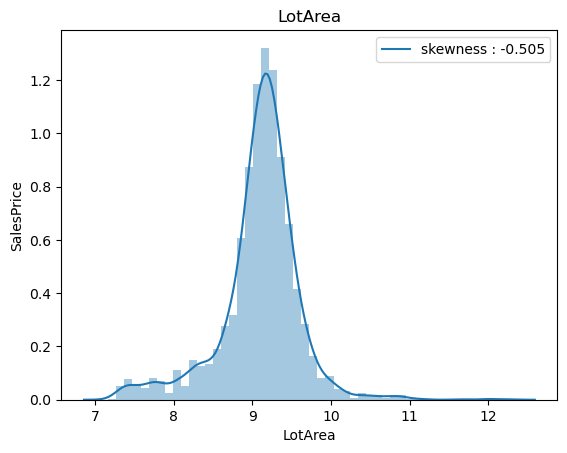

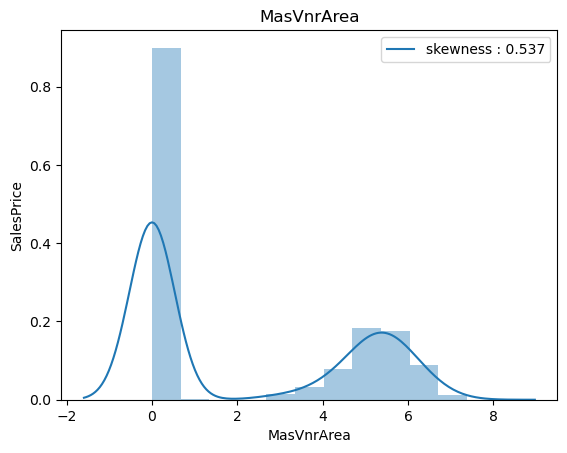

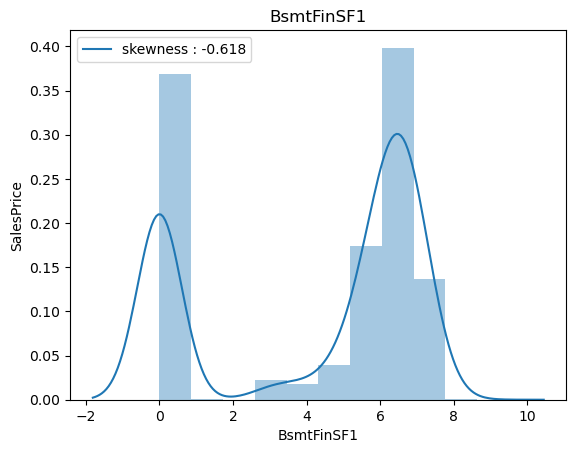

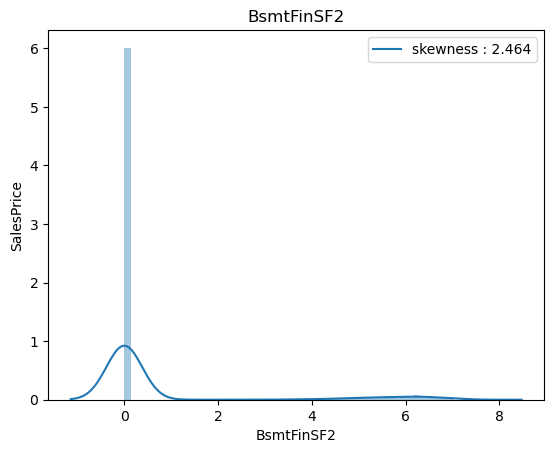

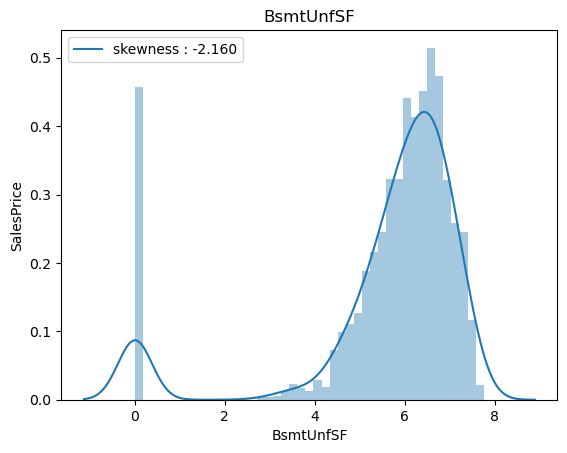

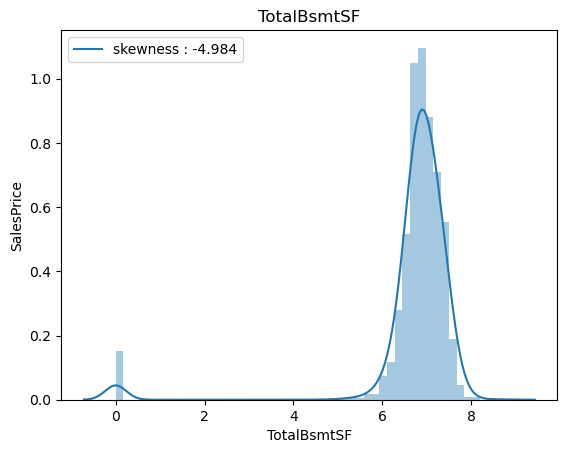

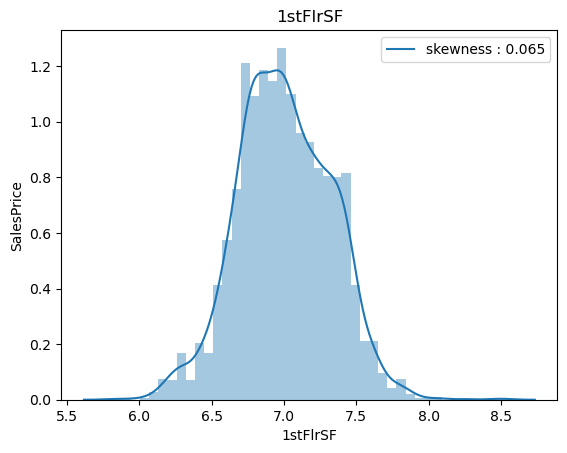

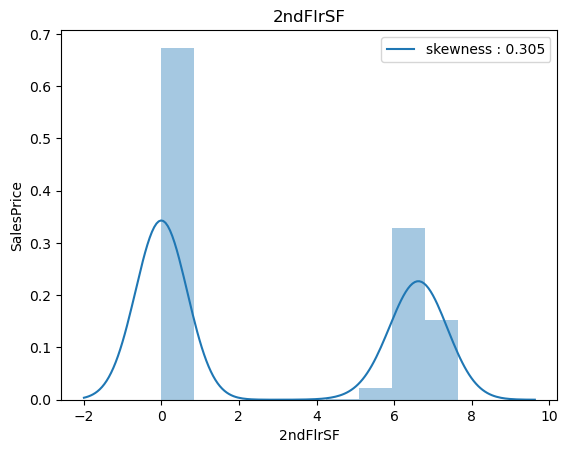

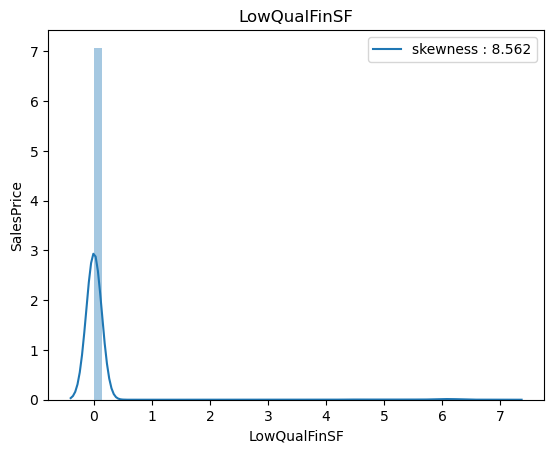

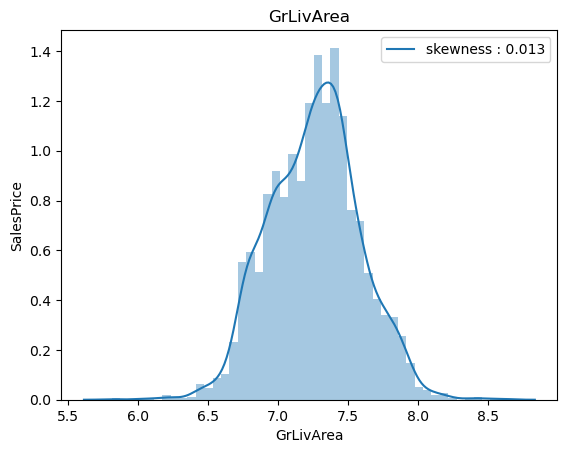

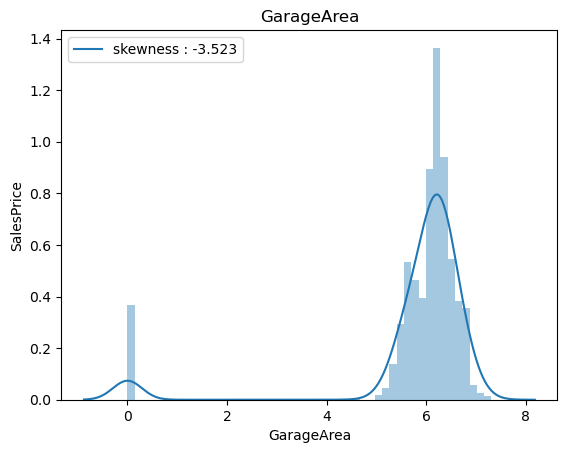

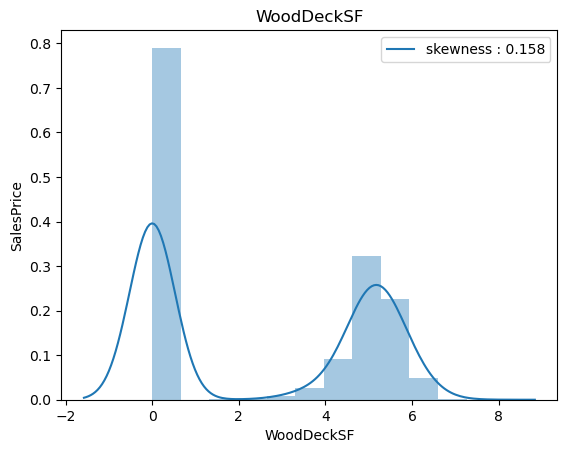

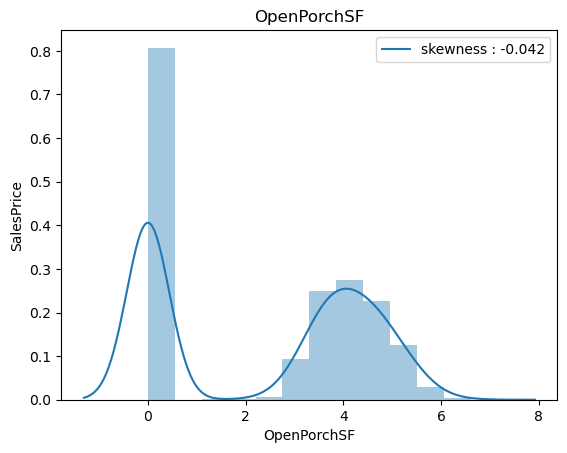

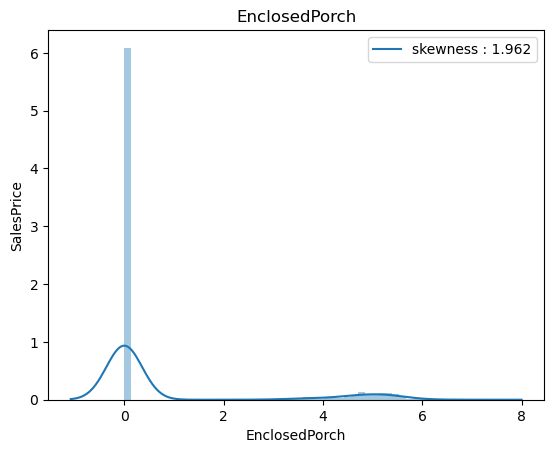

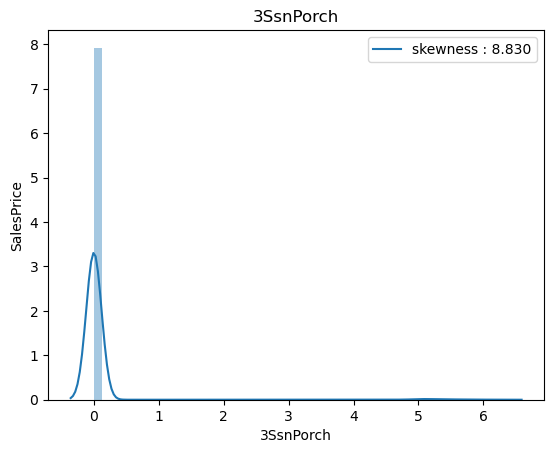

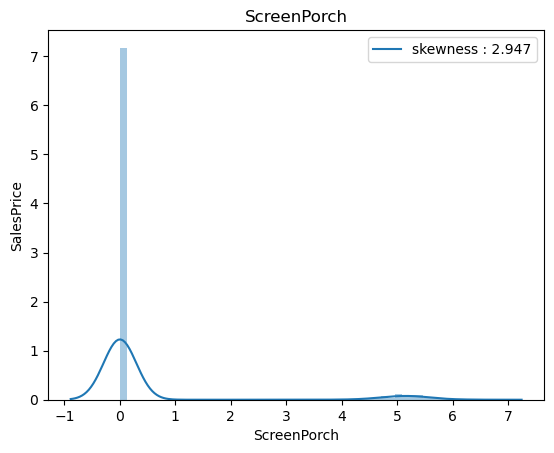

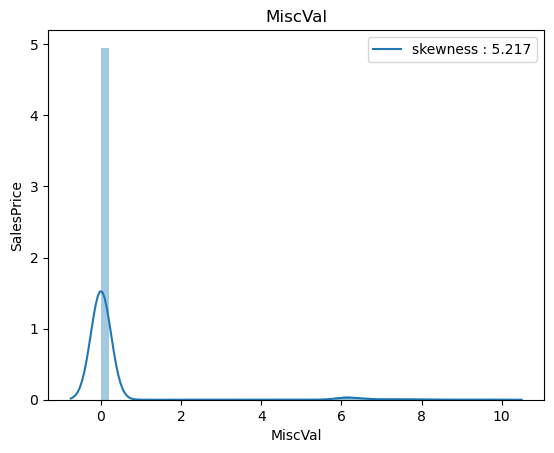

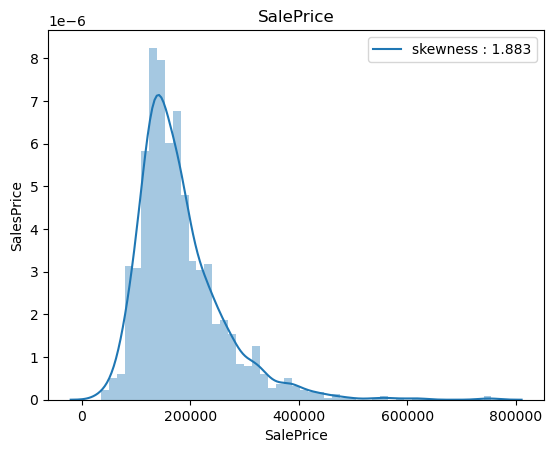

In [71]:
## We will be using logarithmic transformation
for feature in continious:
    data = df_train.copy()
    #data[feature]=np.log1p(data[feature])
    ax = sns.distplot(data[feature])
    ax.legend(["skewness : {:0.3f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show() 

In [72]:
df_train.shape

(2919, 74)

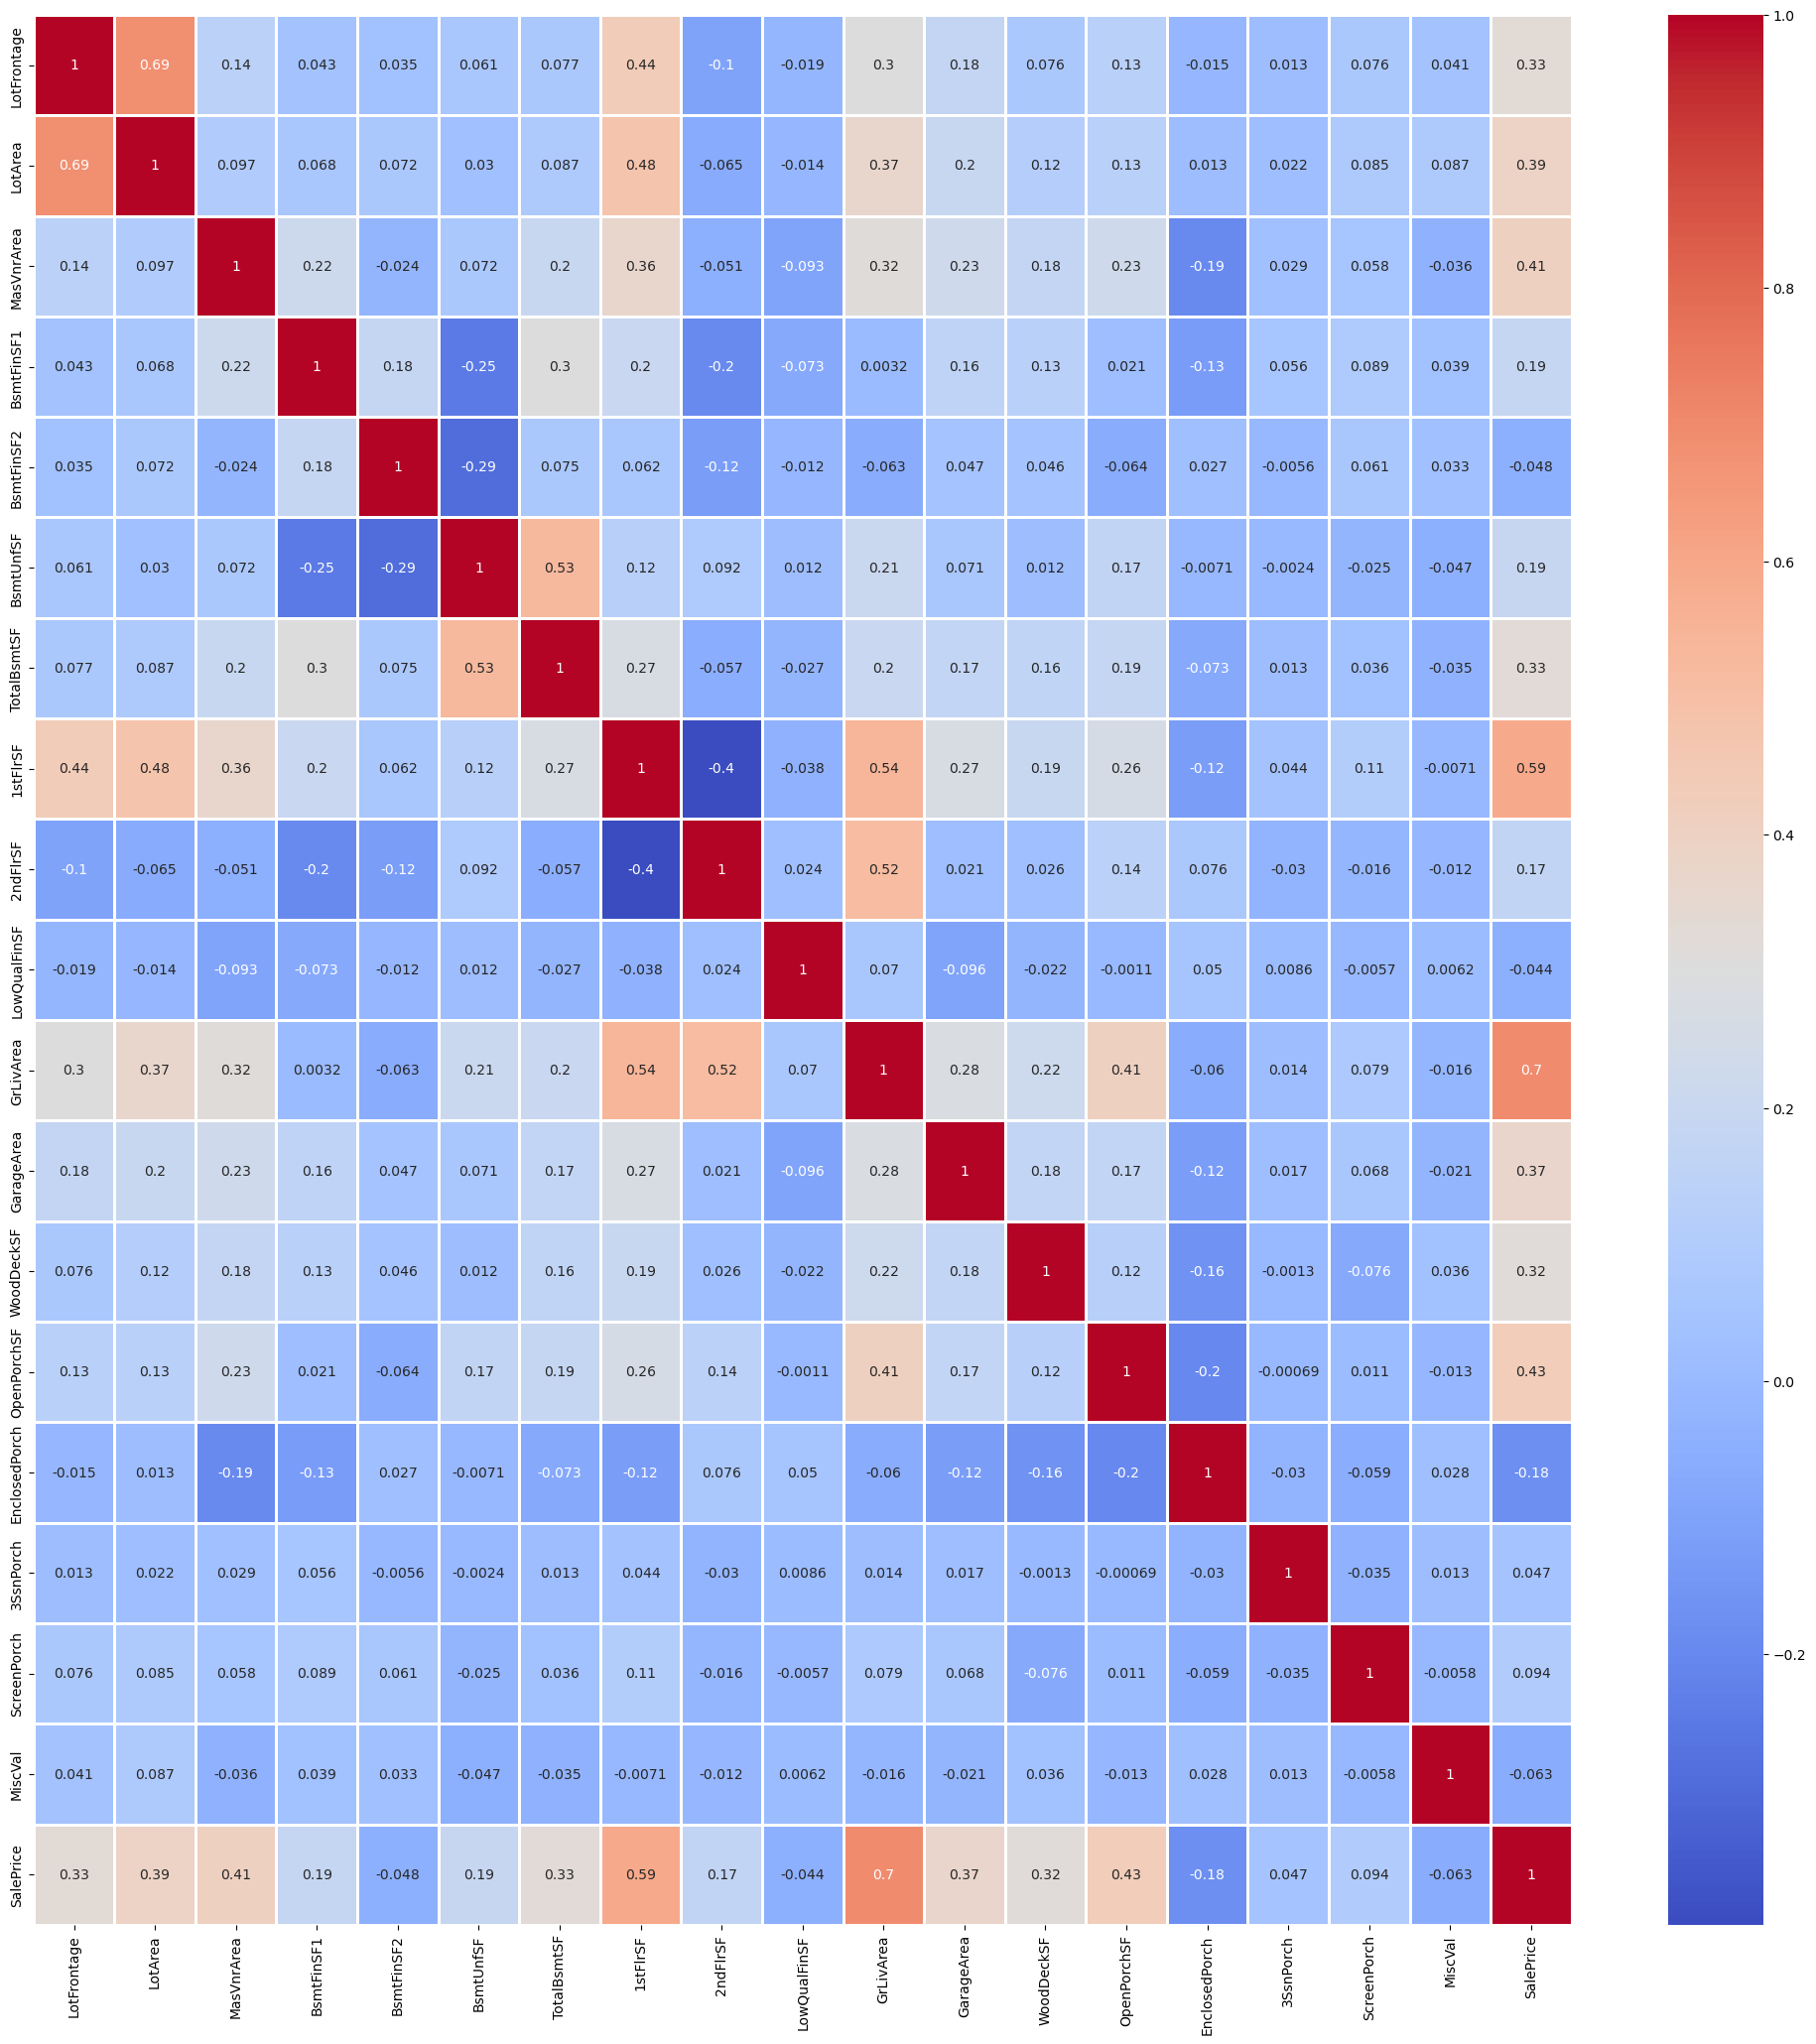

In [73]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train[continious].corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

In [74]:
# correlation heatmap of higly correlated features with SalePrice
low_corr = df_train[continious].corr()
low_corr_features = low_corr.index[low_corr["SalePrice"] < 0.10]
low_corr_features

Index(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal'],
      dtype='object')

In [75]:
df_train.drop(low_corr_features , axis = 1 , inplace = True)

In [76]:
df_train.shape

(2919, 68)

### Handling categorical variables

In [77]:
categorical = [feature for feature in df_train.columns if df_train[feature].dtype == "O"]
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [78]:
categorical = []
for feature in df_train.columns:
    if df_train[feature].dtype == "object":
        categorical.append(feature)
len(categorical)

38

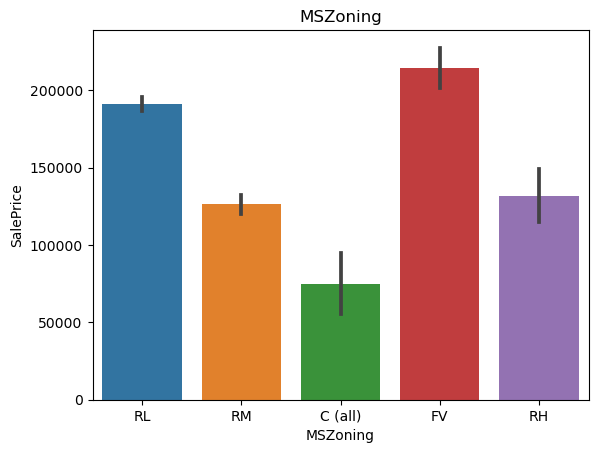

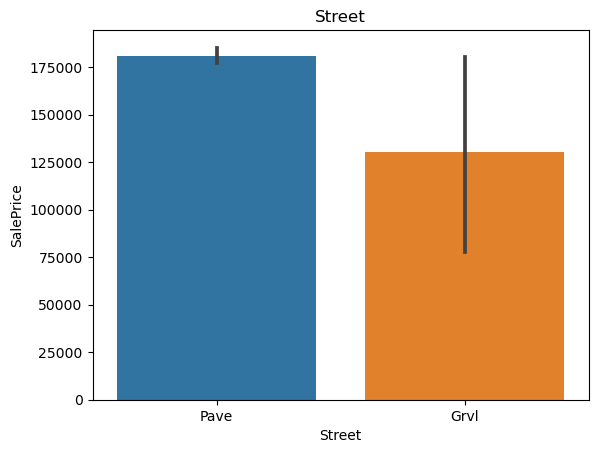

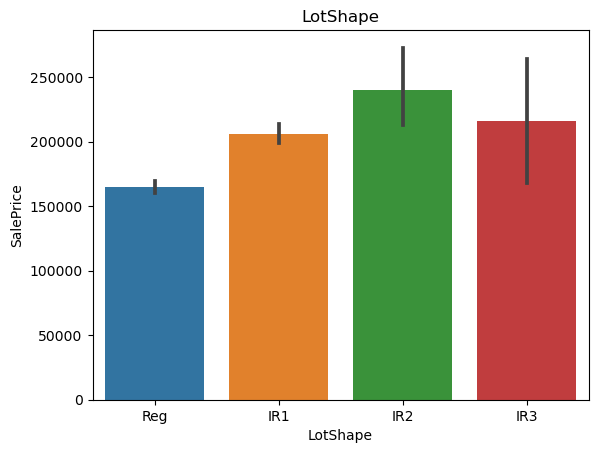

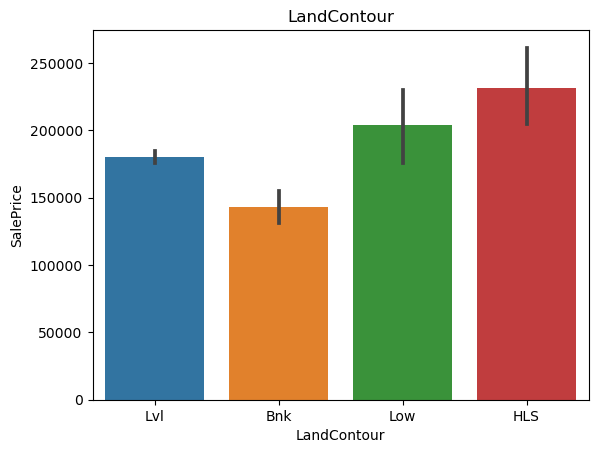

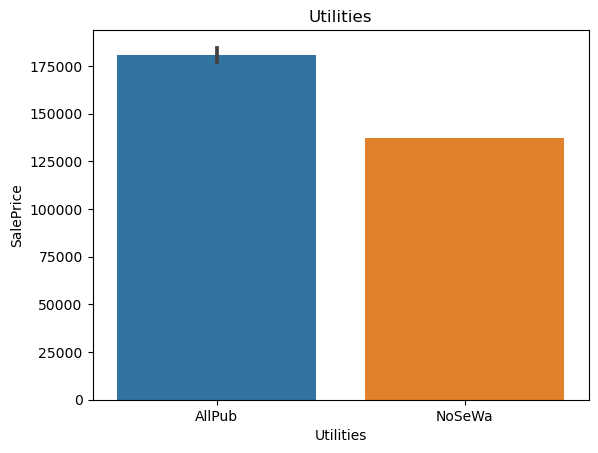

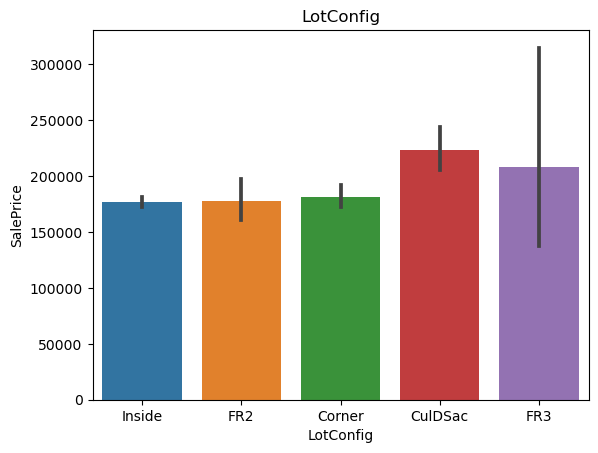

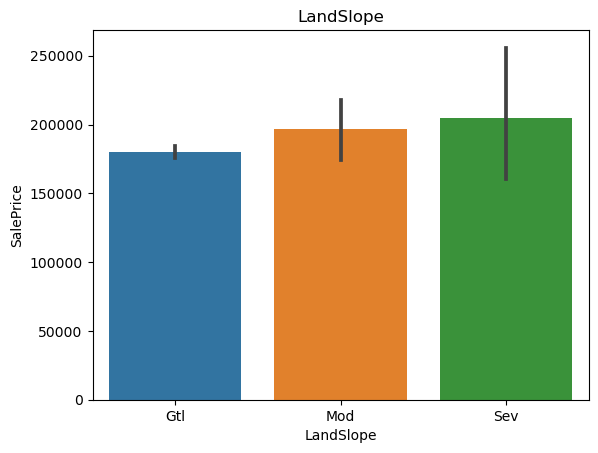

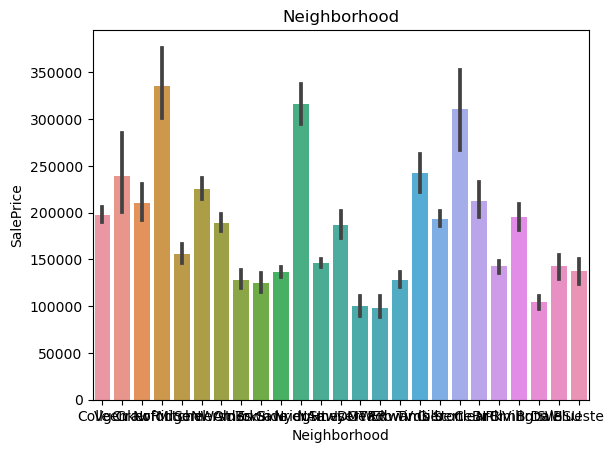

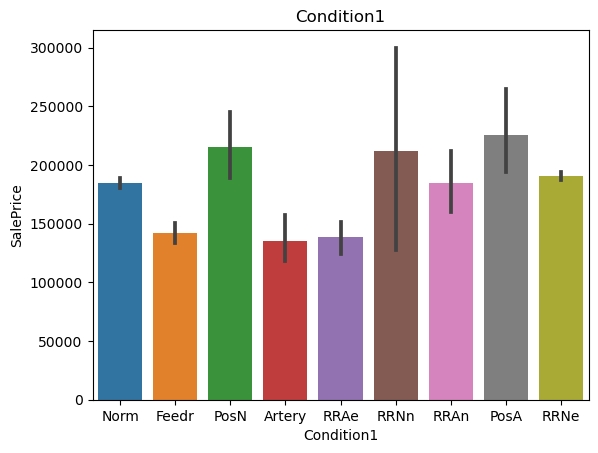

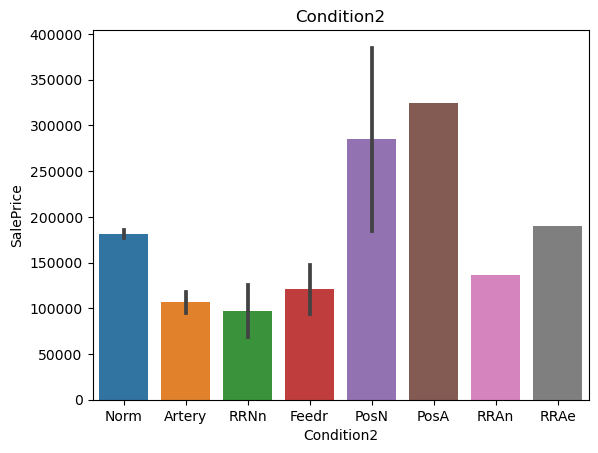

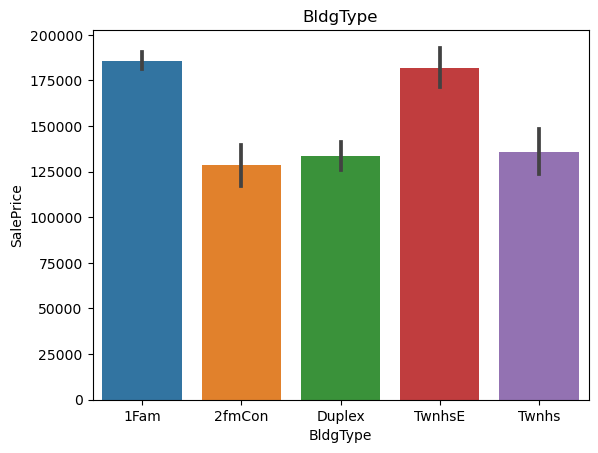

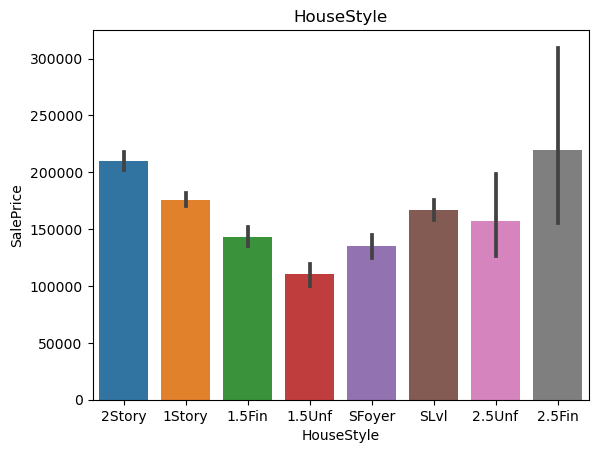

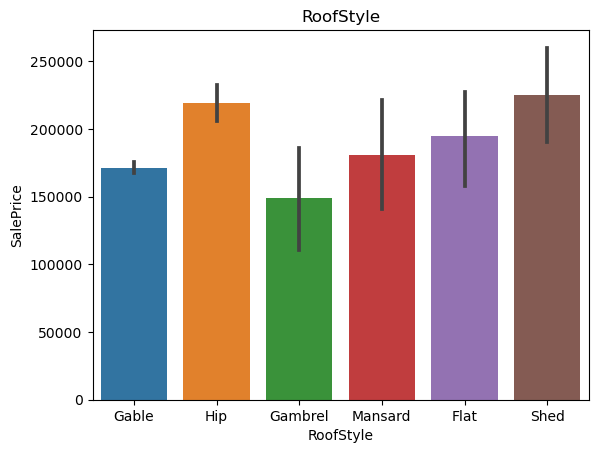

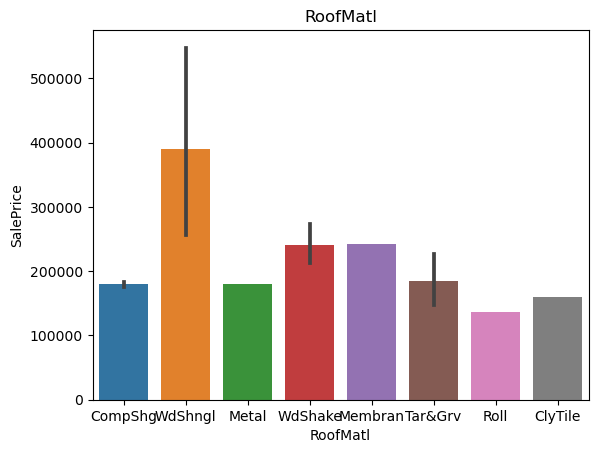

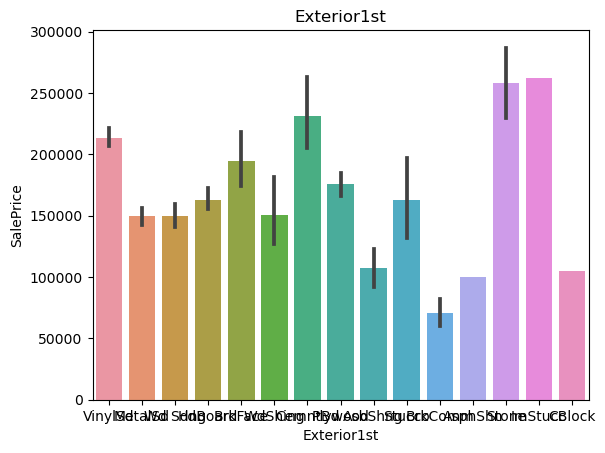

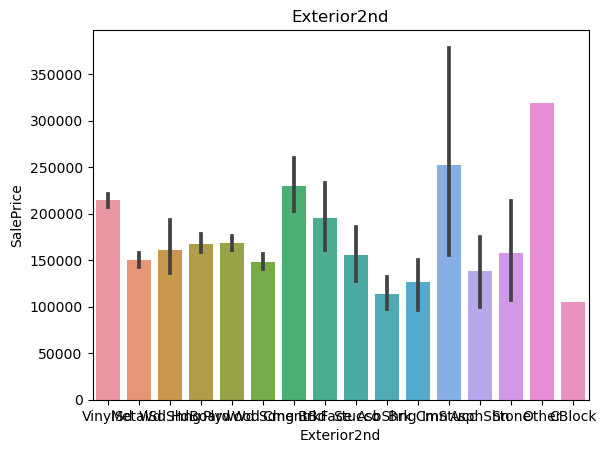

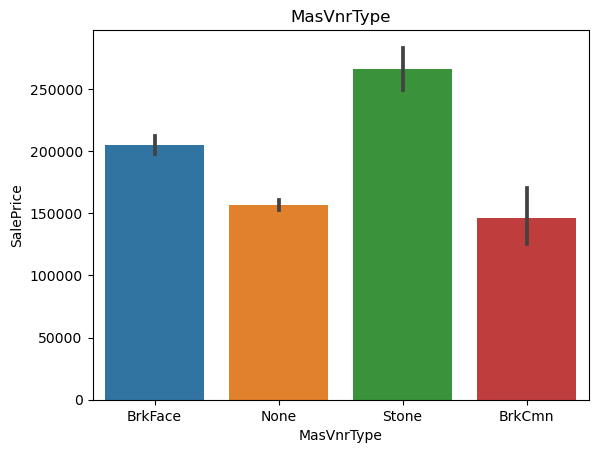

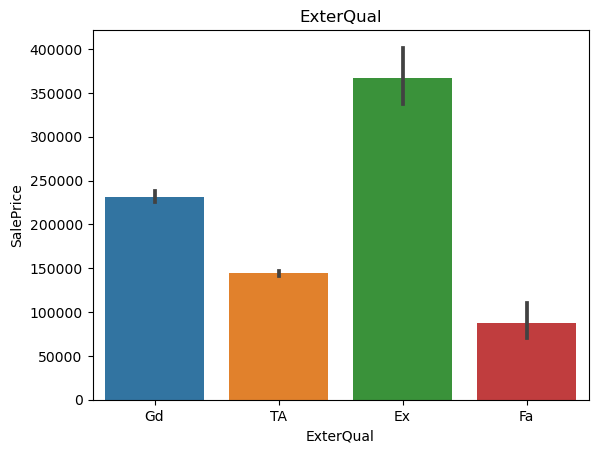

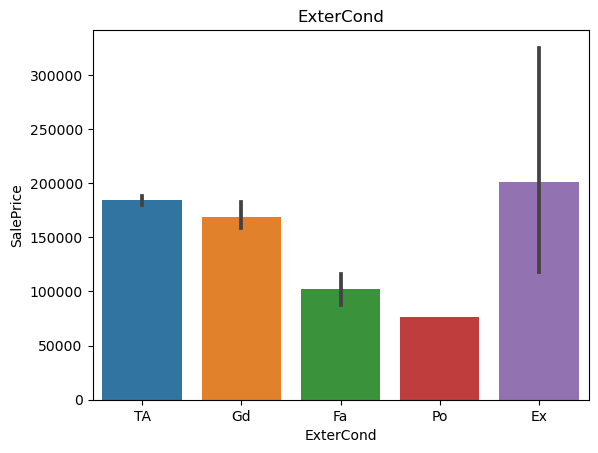

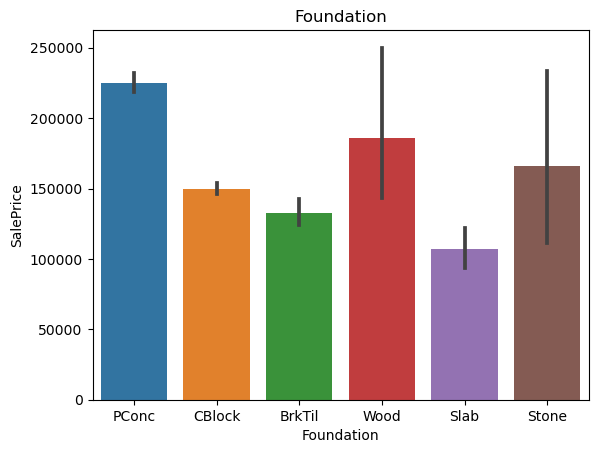

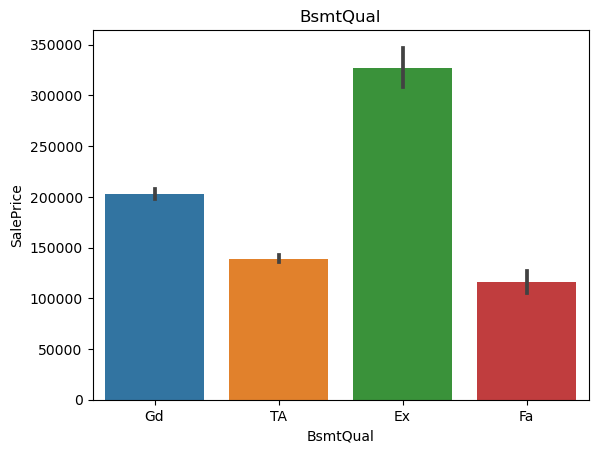

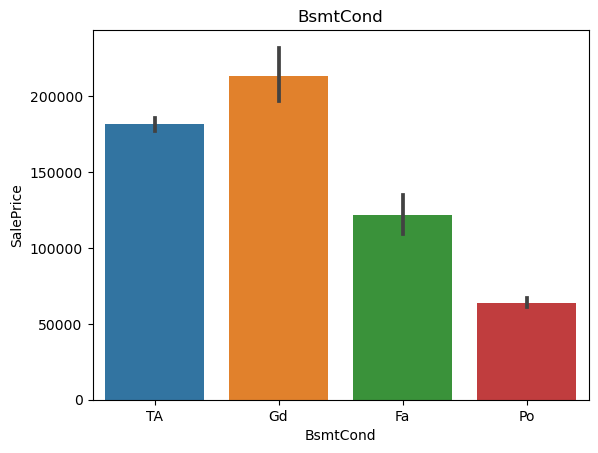

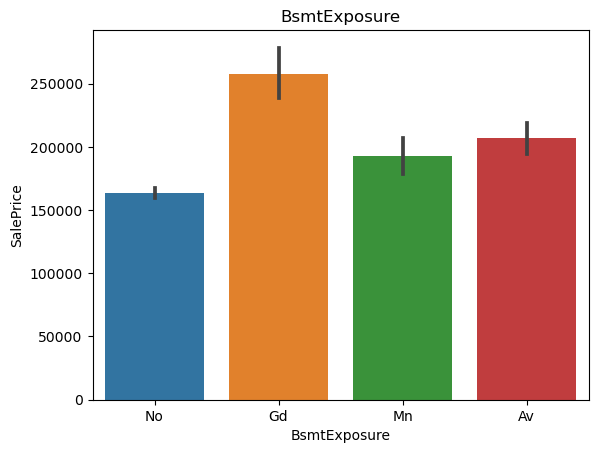

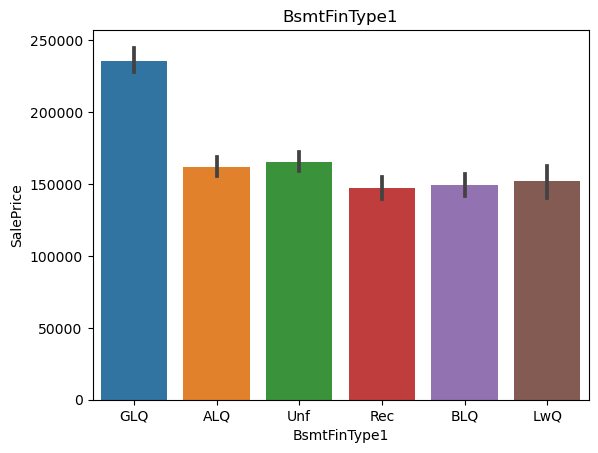

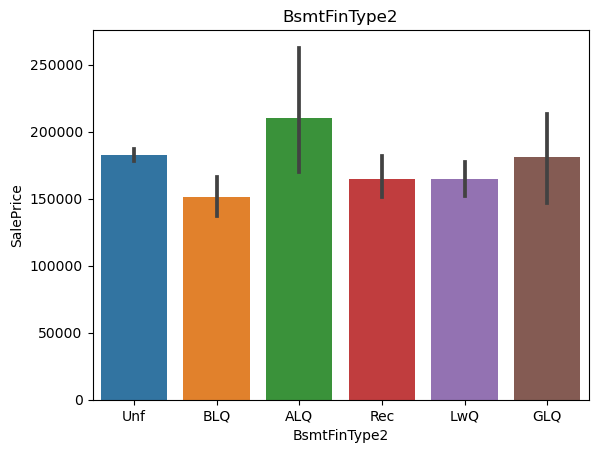

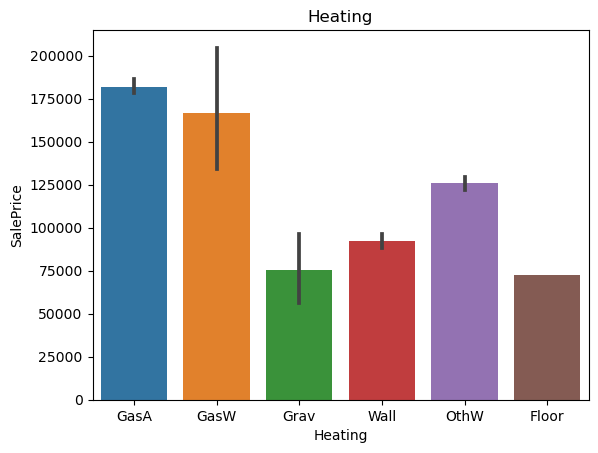

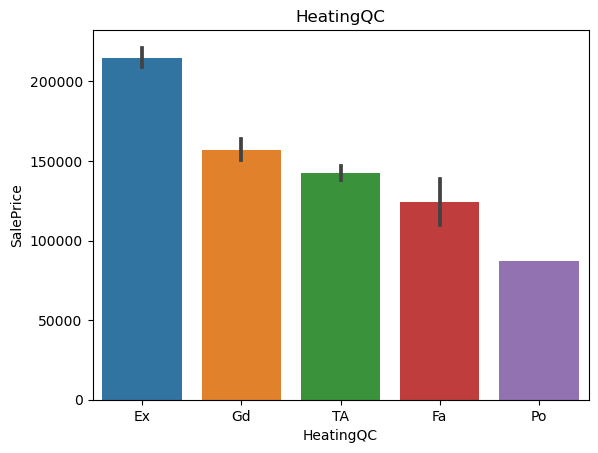

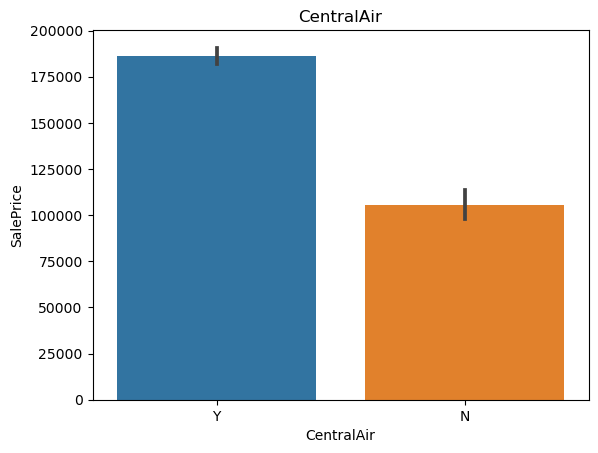

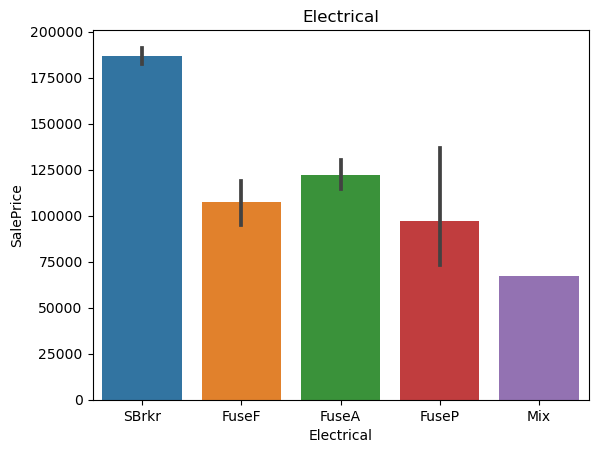

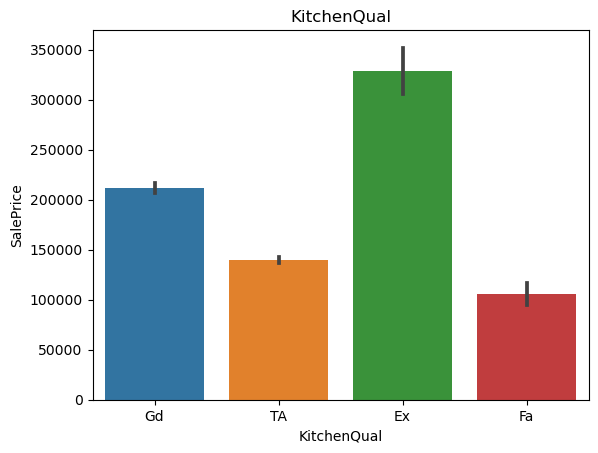

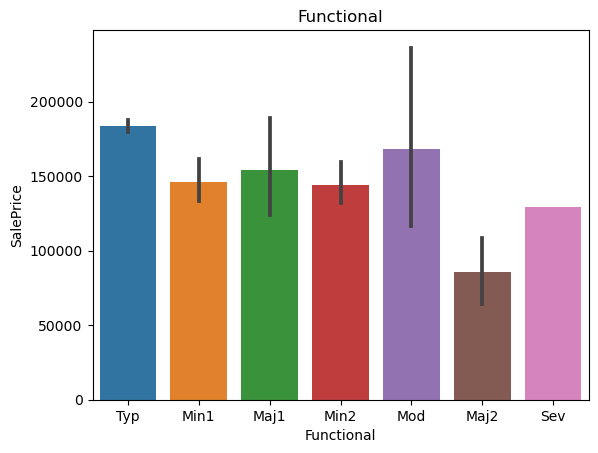

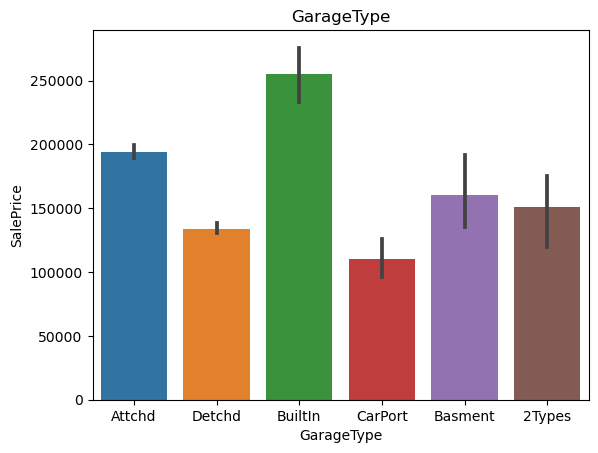

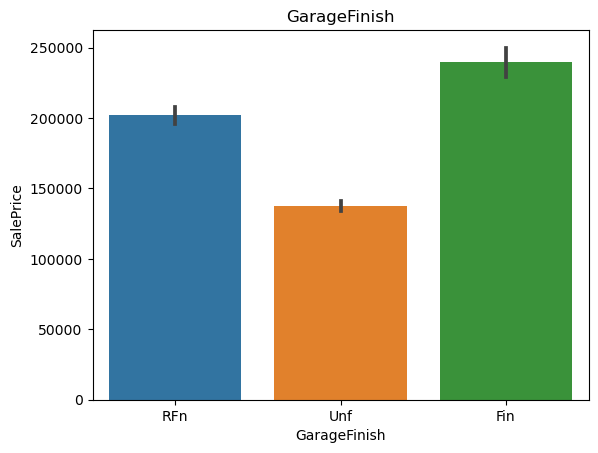

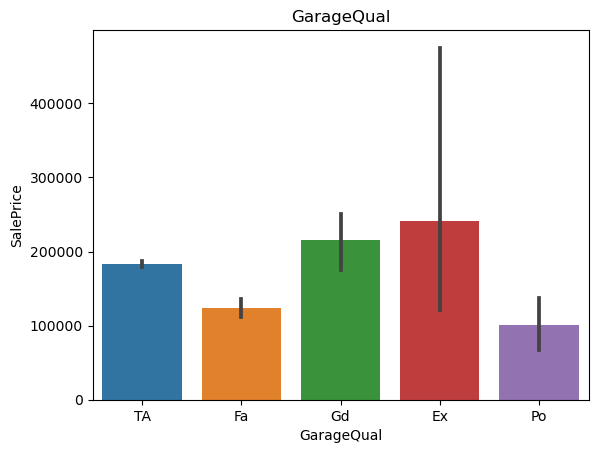

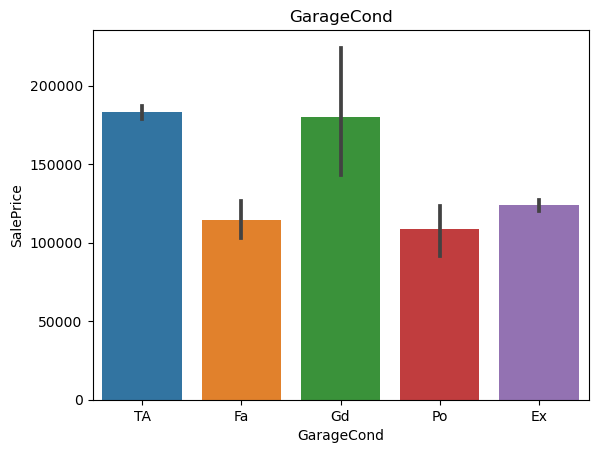

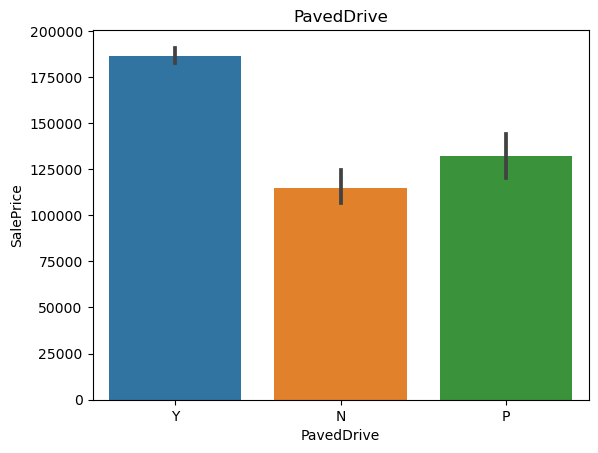

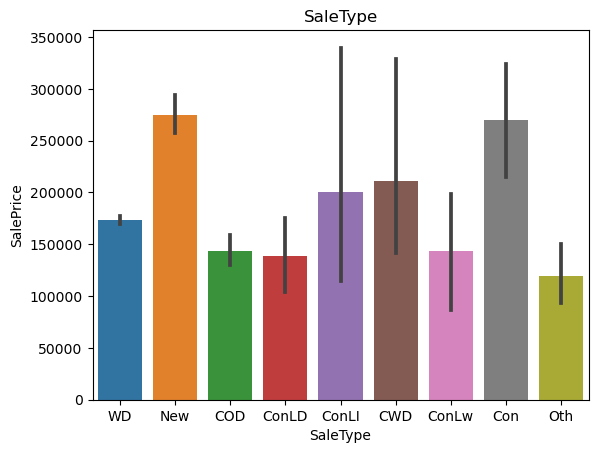

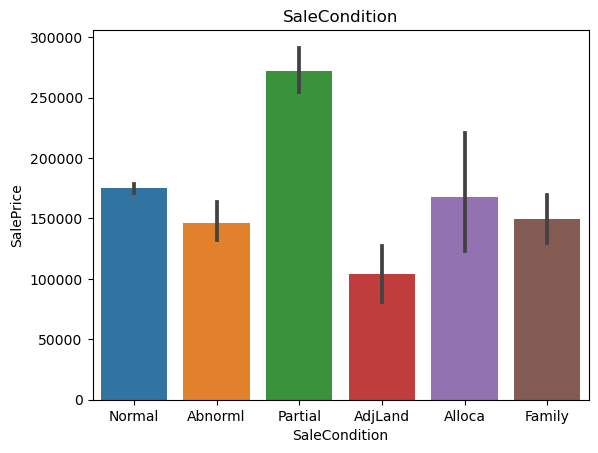

In [79]:
for feature in categorical:
    #df_train.groupby(feature)['SalePrice'].median().plot.bar()
    sns.barplot(x = df_train[feature] , y = df_train["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**ORDINAL**

In [80]:
from pandas.api.types import CategoricalDtype

In [81]:
df_train['BsmtCond'].unique() ## cardinality of categorical variables

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [82]:
df_train['BsmtCond'].value_counts()

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [83]:
df_train['BsmtCond'] = df_train['BsmtCond'].astype(CategoricalDtype(categories=['TA', 'Gd', 'Fa', 'Po'], ordered = True)).cat.codes

In [84]:
df_train['BsmtCond'].value_counts()

0    2688
1     122
2     104
3       5
Name: BsmtCond, dtype: int64

In [85]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtQual'] = df_train['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterQual'] = df_train['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterCond'] = df_train['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['Functional'] = df_train['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_train['GarageCond'] = df_train['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageQual'] = df_train['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageFinish'] = df_train['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_train['HeatingQC'] = df_train['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['KitchenQual'] = df_train['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['PavedDrive'] = df_train['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_train['Utilities'] = df_train['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [86]:
ordinal = ["BsmtCond" , "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2" , "BsmtQual" , "ExterQual" , "ExterCond" , "Functional",
          "GarageCond" , "GarageQual" , "GarageFinish" , "HeatingQC" , "KitchenQual" , "PavedDrive" , "Utilities"]

In [87]:
len(ordinal)

15

In [88]:
df_train.shape

(2919, 68)

In [89]:
df_train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1          20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2          60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3          70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4          60       RL     4.442651  9.565284   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          3       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3          3    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          3       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace    5.283204          3   
1  CompShg     MetalSd     MetalSd       None    0.000000          2   
2  CompShg     VinylSd     VinylSd    BrkFace    5.093750          3   
3  CompShg     Wd Sdng     Wd Shng       None    0.000000          2   
4  CompShg     VinylSd     VinylSd    BrkFace    5.860786          3   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2      PConc         4         0            -1             6   
1          2     CBlock         4         0             3             5   
2          2      PConc         4         0             1             6   
3          2     BrkTil         3         1            -1             5   
4          2      PConc         4         0             2             6   

   BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0    6.561031             1   5.017280     6.753438    GasA          4   
1    6.886532             1   5.652489     7.141245    GasA          4   
2    6.188264             1   6.075346     6.825460    GasA          4   
3    5.379897             1   6.293419     6.629363    GasA          3   
4    6.486161             1   6.196444     7.044033    GasA          4   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr  6.753438  6.751101   7.444833           1.0   
1          Y      SBrkr  7.141245  0.000000   7.141245           0.0   
2          Y      SBrkr  6.825460  6.765039   7.488294           1.0   
3          Y      SBrkr  6.869014  6.629363   7.448916           1.0   
4          Y      SBrkr  7.044033  6.960348   7.695758           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
0             8           7           0     Attchd          5.0             2   
1             6           7           1     Attchd         31.0             2   
2             6           7           1     Attchd          7.0             2   
3             7           7  

**Nominal**

* **One hot encoding**

In [90]:
nominal = [feature for feature in categorical if feature not in ordinal]
nominal

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [91]:
nominal = []
for feature in categorical:
    if feature not in ordinal:
        nominal.append(feature)
len(nominal)

23

In [92]:
df_train['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [93]:
#nominal = [feature for feature in categorical if feature not in ordinal]
for feature in nominal:
    print(feature , len(df_train[feature].unique()))

MSZoning 5
Street 2
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
Foundation 6
Heating 6
CentralAir 2
Electrical 5
GarageType 6
SaleType 9
SaleCondition 6


In [94]:
new_nominal = ["Neighborhood" , "Exterior1st" , "Exterior2nd"]
new_nominal
#nominal1 = [feature for feature in nominal if feature not in new_nominal]

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [95]:
nominal1 = []
for feature in nominal:
    if feature not in new_nominal:
        nominal1.append(feature)
nominal1       

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [96]:
len(nominal1)

20

In [97]:
len(nominal)

23

In [98]:
nominal_variable = pd.get_dummies(df_train[nominal1], drop_first=True)
#nominal_variable.drop(new_nominal , axis = 1 , inplace = True)

In [99]:
nominal_variable.shape

(2919, 91)

In [100]:
nominal_variable.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  \
0                 1              0              0                 0   
1                 0              0              0                 1   
2                 1              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 0   

   Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                1                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  0   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   HouseStyle_2.5Fin  

* **One hot encoding with many variables**

In [101]:
df_train["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [102]:
def top_ten(feature):
    top_ten = []
    for x in feature.value_counts().sort_values(ascending = False).head(10).index:
        top_ten.append(x)
    return top_ten       

In [103]:
top_ten(df_train["Neighborhood"])

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Somerst',
 'NridgHt',
 'Gilbert',
 'Sawyer',
 'NWAmes',
 'SawyerW']

In [104]:
top_10_Neighborhood = top_ten(df_train["Neighborhood"])
top_10_Exterior1st =  top_ten(df_train["Exterior1st"])
top_10_Exterior2nd =  top_ten(df_train["Exterior2nd"])

In [105]:
df_train["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [106]:
df_train["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [107]:
for label in top_10_Neighborhood:
    print(label)

NAmes
CollgCr
OldTown
Edwards
Somerst
NridgHt
Gilbert
Sawyer
NWAmes
SawyerW


In [108]:
#top_10_Neighborhood = [x for x in df_train.Neighborhood.value_counts().sort_values(ascending=False).head(10).index]
#top_10_Exterior1st = [x for x in df_train.Exterior1st.value_counts().sort_values(ascending=False).head(10).index]
#top_10_Exterior2nd = [x for x in df_train.Exterior2nd.value_counts().sort_values(ascending=False).head(10).index]


for i in top_10_Neighborhood:
    df_train[i]= np.where(df_train["Neighborhood"]== i,1,0) 
    
for label in top_10_Exterior1st:
    df_train[label]= np.where(df_train["Exterior1st"]==label,1,0)
    
#for label in top_10_Exterior2nd:a
    #df_train[label]= np.where(df_train["Exterior2nd"]==label,1,0)
    
#df_train[top_10_Exterior2nd].head()

In [109]:
df_train[top_10_Neighborhood].head()

NAmes  CollgCr  OldTown  Edwards  Somerst  NridgHt  Gilbert  Sawyer  \
0      0        1        0        0        0        0        0       0   
1      0        0        0        0        0        0        0       0   
2      0        1        0        0        0        0        0       0   
3      0        0        0        0        0        0        0       0   
4      0        0        0        0        0        0        0       0   

   NWAmes  SawyerW  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0

In [110]:
df_train[top_10_Exterior1st].head()

VinylSd  MetalSd  HdBoard  Wd Sdng  Plywood  CemntBd  BrkFace  WdShing  \
0        1        0        0        0        0        0        0        0   
1        0        1        0        0        0        0        0        0   
2        1        0        0        0        0        0        0        0   
3        0        0        0        1        0        0        0        0   
4        1        0        0        0        0        0        0        0   

   AsbShng  Stucco  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0

In [111]:
df_train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1          20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2          60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3          70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4          60       RL     4.442651  9.565284   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          3       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3          3    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          3       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace    5.283204          3   
1  CompShg     MetalSd     MetalSd       None    0.000000          2   
2  CompShg     VinylSd     VinylSd    BrkFace    5.093750          3   
3  CompShg     Wd Sdng     Wd Shng       None    0.000000          2   
4  CompShg     VinylSd     VinylSd    BrkFace    5.860786          3   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2      PConc         4         0            -1             6   
1          2     CBlock         4         0             3             5   
2          2      PConc         4         0             1             6   
3          2     BrkTil         3         1            -1             5   
4          2      PConc         4         0             2             6   

   BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0    6.561031             1   5.017280     6.753438    GasA          4   
1    6.886532             1   5.652489     7.141245    GasA          4   
2    6.188264             1   6.075346     6.825460    GasA          4   
3    5.379897             1   6.293419     6.629363    GasA          3   
4    6.486161             1   6.196444     7.044033    GasA          4   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr  6.753438  6.751101   7.444833           1.0   
1          Y      SBrkr  7.141245  0.000000   7.141245           0.0   
2          Y      SBrkr  6.825460  6.765039   7.488294           1.0   
3          Y      SBrkr  6.869014  6.629363   7.448916           1.0   
4          Y      SBrkr  7.044033  6.960348   7.695758           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
0             8           7           0     Attchd          5.0             2   
1             6           7           1     Attchd         31.0             2   
2             6           7           1     Attchd          7.0             2   
3             7           7  

In [112]:
df_train.shape

(2919, 88)

In [113]:
len(nominal)

23

In [114]:
df_train.drop(nominal , axis = 1 , inplace = True)

In [115]:
df_train.head()

MSSubClass  LotFrontage   LotArea  Utilities  OverallQual  OverallCond  \
0          60     4.189655  9.042040          3            7            5   
1          20     4.394449  9.169623          3            6            8   
2          60     4.234107  9.328212          3            7            5   
3          70     4.110874  9.164401          3            7            5   
4          60     4.442651  9.565284          3            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0          5             5    5.283204          3          2         4   
1         31            31    0.000000          2          2         4   
2          7             6    5.093750          3          2         4   
3         91            36    0.000000          2          2         3   
4          8             8    5.860786          3          2         4   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0         0            -1             6    6.561031             1   5.017280   
1         0             3             5    6.886532             1   5.652489   
2         0             1             6    6.188264             1   6.075346   
3         1            -1             5    5.379897             1   6.293419   
4         0             2             6    6.486161             1   6.196444   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0     6.753438          4  6.753438  6.751101   7.444833           1.0   
1     7.141245          4  7.141245  0.000000   7.141245           0.0   
2     6.825460          4  6.825460  6.765039   7.488294           1.0   
3     6.629363          3  6.869014  6.629363   7.448916           1.0   
4     7.044033          4  7.044033  6.960348   7.695758           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  \
0             8           7           0          5.0             2   
1             6           7           1         31.0             2   
2             6           7           1          7.0             2   
3             7           7           1          8.0             1   
4             9           7           1          8.0             2   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         2.0    6.308098           3           3           2    0.000000   
1         2.0    6.133398           3           3           2    5.700444   
2         2.0    6.411818           3           3           2    0.000000   
3         3.0    6.466145           3           3           2    0.000000   
4         3.0    6.729824           3           3           2    5.262690   

   OpenPorchSF  PoolArea  MoSold  SalePrice  NAmes  CollgCr  OldTown  Edwards  \
0     4.127134         0       2   208500.0      0        1        0        0   
1     0.000000         0       5   181500.0      0        0        0        0   
2     3.761200         0       9   223500.0      0        1        0        0   
3     3.583519         0       2   140000.0      0        0        0        0   
4     4.442651         0      12   250000.0      0        0        0        0   

   Somerst  NridgHt  Gilbert  Sawyer  NWAmes  SawyerW  VinylSd  MetalSd  \
0        0        0        0       0       0        0        1        0   
1        0        0        0       0       0        0        0        1   
2        0        0        0       0       0        0        1        0   
3        0       

In [116]:
df_train.shape

(2919, 65)

In [117]:
train = pd.concat([nominal_variable , df_train] , axis = 1)

In [118]:
train.shape

(2919, 156)

In [119]:
train.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  \
0                 1              0              0                 0   
1                 0              0              0                 1   
2                 1              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 0   

   Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                1                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  0   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   HouseStyle_2.5Fin  

In [120]:
train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [121]:
#preview the df
#train =  train.loc[:,~ train.columns.duplicated()]
#train.shape

In [122]:
train.isnull().sum()

MSZoning_FV                 0
MSZoning_RH                 0
MSZoning_RL                 0
MSZoning_RM                 0
Street_Pave                 0
LotShape_IR2                0
LotShape_IR3                0
LotShape_Reg                0
LandContour_HLS             0
LandContour_Low             0
LandContour_Lvl             0
LotConfig_CulDSac           0
LotConfig_FR2               0
LotConfig_FR3               0
LotConfig_Inside            0
LandSlope_Mod               0
LandSlope_Sev               0
Condition1_Feedr            0
Condition1_Norm             0
Condition1_PosA             0
Condition1_PosN             0
Condition1_RRAe             0
Condition1_RRAn             0
Condition1_RRNe             0
Condition1_RRNn             0
Condition2_Feedr            0
Condition2_Norm             0
Condition2_PosA             0
Condition2_PosN             0
Condition2_RRAe             0
Condition2_RRAn             0
Condition2_RRNn             0
BldgType_2fmCon             0
BldgType_D

In [123]:
train.isnull().sum().sum()

1459

### split data into test and train

In [124]:
train_df = train.iloc[:1460, :]
test1 = train.iloc[1460: , :]

print(train_df.shape)
print(test1.shape)
#print(len(y_train))

(1460, 156)
(1459, 156)


In [125]:
test1['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

In [126]:
test = test1.drop("SalePrice" , axis = 1)
test.shape

(1459, 155)

In [127]:
X = train_df.drop("SalePrice" , axis = 1)
y = train_df["SalePrice"]

In [128]:
X.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  \
0                 1              0              0                 0   
1                 0              0              0                 1   
2                 1              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 0   

   Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                1                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  0   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   HouseStyle_2.5Fin  

In [129]:
X.shape

(1460, 155)

In [130]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

## Feature Selection

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [132]:
print(model.feature_importances_)

[2.11933503e-04 3.15719240e-05 2.89078558e-03 3.66255974e-03
 3.80425267e-05 2.65823079e-03 1.95434580e-04 2.20682816e-03
 7.95335613e-04 1.42075845e-03 2.14532905e-03 1.46303111e-03
 4.32566777e-04 5.45724609e-05 1.62562122e-03 1.21228990e-03
 5.43002052e-04 3.37185352e-04 1.38802390e-03 1.47766647e-04
 5.87296390e-04 7.17114675e-05 1.40223315e-04 6.62899351e-06
 1.46462718e-05 6.19051554e-06 2.13913775e-04 2.01141616e-05
 5.99354247e-04 5.01744343e-06 1.79704462e-08 6.16048142e-07
 6.34441178e-05 1.81264776e-04 1.33061713e-04 5.81559709e-04
 3.32557531e-05 9.31787169e-04 2.12881096e-04 5.08071043e-05
 1.66132895e-03 4.61820322e-05 1.97311649e-04 1.20407718e-03
 3.04769857e-04 1.54647895e-03 1.04545667e-05 1.44277654e-05
 3.97095139e-04 7.01558757e-05 1.37015192e-05 2.32045862e-07
 7.54056665e-05 6.86061428e-06 2.41354289e-04 1.36698930e-03
 8.63441280e-04 1.94758684e-03 8.21798673e-04 1.23566050e-03
 3.63115198e-05 3.61608804e-05 4.43754130e-05 1.15375505e-04
 1.37271147e-04 1.010155

In [133]:
len(model.feature_importances_)

155

In [134]:
X.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CemntBd',
       'BrkFace', 'WdShing', 'AsbShng', 'Stucco'],
      dtype='object', length=155)

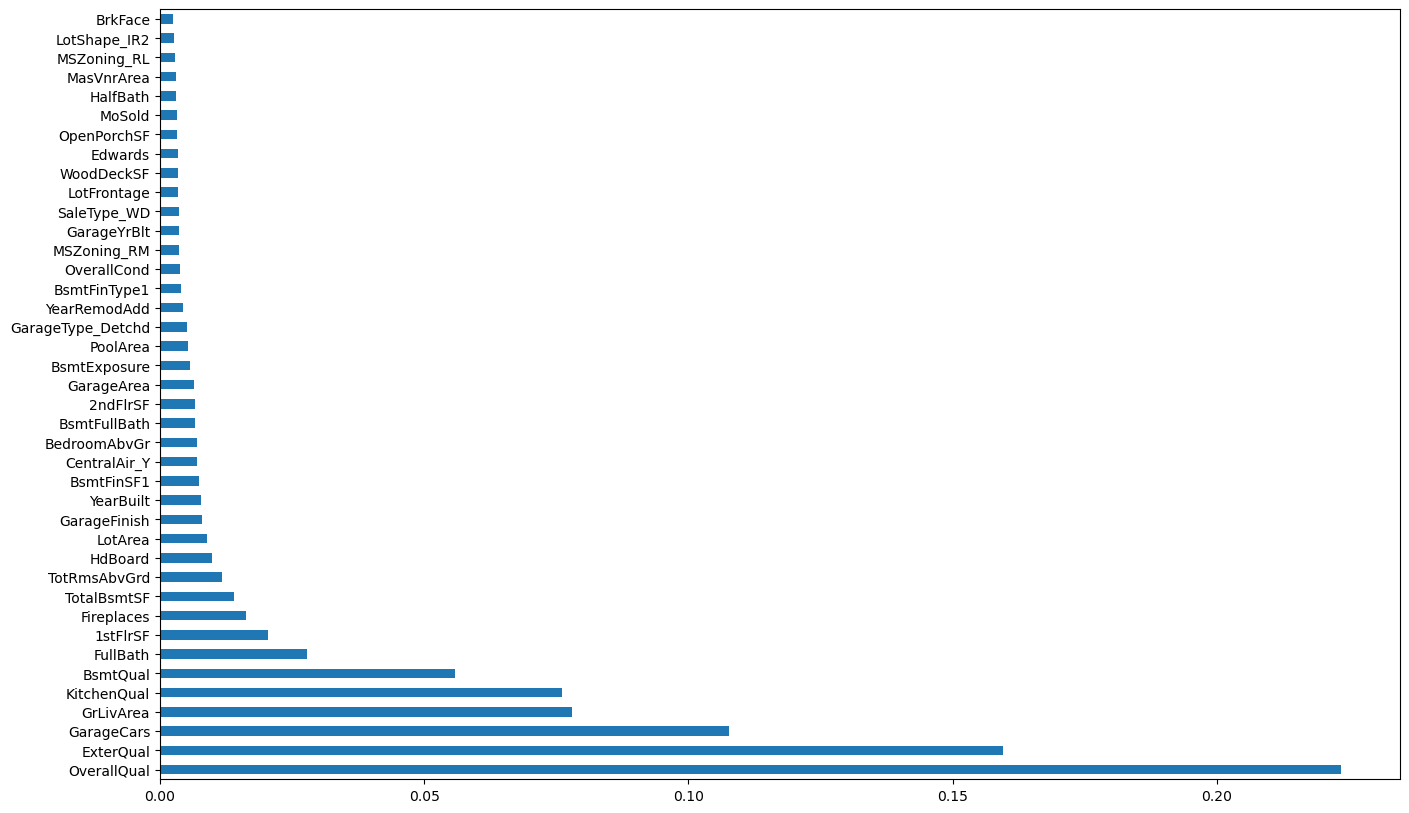

In [135]:
plt.figure(figsize = (16 , 10))
ranked_features =  pd.Series(model.feature_importances_, index = X.columns)
ranked_features.nlargest(40).plot(kind='barh')
plt.show()

In [136]:
features = ranked_features.nlargest(23)
features

OverallQual     0.223471
ExterQual       0.159508
GarageCars      0.107769
GrLivArea       0.077910
KitchenQual     0.076163
BsmtQual        0.055806
FullBath        0.027794
1stFlrSF        0.020402
Fireplaces      0.016272
TotalBsmtSF     0.013946
TotRmsAbvGrd    0.011722
HdBoard         0.009875
LotArea         0.008815
GarageFinish    0.007967
YearBuilt       0.007777
BsmtFinSF1      0.007461
CentralAir_Y    0.006934
BedroomAbvGr    0.006915
BsmtFullBath    0.006617
2ndFlrSF        0.006569
GarageArea      0.006372
BsmtExposure    0.005701
PoolArea        0.005250
dtype: float64

In [137]:
features.index

Index(['OverallQual', 'ExterQual', 'GarageCars', 'GrLivArea', 'KitchenQual',
       'BsmtQual', 'FullBath', '1stFlrSF', 'Fireplaces', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'HdBoard', 'LotArea', 'GarageFinish', 'YearBuilt',
       'BsmtFinSF1', 'CentralAir_Y', 'BedroomAbvGr', 'BsmtFullBath',
       '2ndFlrSF', 'GarageArea', 'BsmtExposure', 'PoolArea'],
      dtype='object')

In [138]:
X = train_df[features.index]

In [139]:
X.shape

(1460, 23)

In [140]:
X.head()

OverallQual  ExterQual  GarageCars  GrLivArea  KitchenQual  BsmtQual  \
0            7          3         2.0   7.444833            3         4   
1            6          2         2.0   7.141245            2         4   
2            7          3         2.0   7.488294            3         4   
3            7          2         3.0   7.448916            3         3   
4            8          3         3.0   7.695758            3         4   

   FullBath  1stFlrSF  Fireplaces  TotalBsmtSF  TotRmsAbvGrd  HdBoard  \
0         2  6.753438           0     6.753438             8        0   
1         2  7.141245           1     7.141245             6        0   
2         2  6.825460           1     6.825460             6        0   
3         1  6.869014           1     6.629363             7        0   
4         2  7.044033           1     7.044033             9        0   

    LotArea  GarageFinish  YearBuilt  BsmtFinSF1  CentralAir_Y  BedroomAbvGr  \
0  9.042040             2          5    6.561031             1             3   
1  9.169623             2         31    6.886532             1             3   
2  9.328212             2          7    6.188264             1             3   
3  9.164401             1         91    5.379897             1             3   
4  9.565284             2          8    6.486161             1             4   

   BsmtFullBath  2ndFlrSF  GarageArea  BsmtExposure  PoolArea  
0           1.0  6.751101    6.308098            -1         0  
1           0.0  0.000000    6.133398             3         0  
2           1.0  6.765039    6.411818             1         0  
3           1.0  6.629363    6.466145            -1         0  
4           1.0  6.960348    6.729824             2         0

## Model Building

In [141]:
# split dataset into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Robost scaller

In [142]:
test1 = test[features.index]
test1.head()

OverallQual  ExterQual  GarageCars  GrLivArea  KitchenQual  BsmtQual  \
0            5          2         1.0   6.799056            2         3   
1            6          2         1.0   7.192934            3         3   
2            5          2         2.0   7.396335            2         4   
3            6          2         2.0   7.380879            3         3   
4            8          3         2.0   7.155396            3         4   

   FullBath  1stFlrSF  Fireplaces  TotalBsmtSF  TotRmsAbvGrd  HdBoard  \
0         1  6.799056           0     6.783325             5        0   
1         1  7.192934           0     7.192934             6        0   
2         2  6.834109           1     6.834109             6        0   
3         2  6.831954           1     6.831954             7        0   
4         2  7.155396           0     7.155396             5        1   

    LotArea  GarageFinish  YearBuilt  BsmtFinSF1  CentralAir_Y  BedroomAbvGr  \
0  9.360741             1         49    6.150603             1             2   
1  9.565775             1         52    6.828712             1             3   
2  9.534668             3         13    6.674561             1             3   
3  9.208238             3         12    6.401917             1             3   
4  8.518392             2         18    5.575949             1             2   

   BsmtFullBath  2ndFlrSF  GarageArea  BsmtExposure  PoolArea  
0           0.0  0.000000    6.594413            -1         0  
1           0.0  0.000000    5.746203            -1         0  
2           0.0  6.553933    6.180017            -1         0  
3           0.0  6.520621    6.154858            -1         0  
4           0.0  0.000000    6.228511            -1         0

In [143]:
test1.shape

(1459, 23)

In [144]:
X_train

OverallQual  ExterQual  GarageCars  GrLivArea  KitchenQual  BsmtQual  \
1358            6          3         2.0   7.361375            3         4   
390             5          2         1.0   7.221105            2         3   
1334            5          2         2.0   7.219642            2         3   
1072            5          2         1.0   7.284135            2         2   
1443            6          2         1.0   6.859615            1         3   
887             5          2         1.0   7.239933            2         3   
766             7          2         2.0   7.447168            2         4   
637             5          2         1.0   7.235619            3         3   
1227            5          2         2.0   6.816736            3         3   
220             7          3         2.0   7.312553            3         4   
592             5          2         2.0   6.705639            2         3   
1148            7          2         1.0   7.013915            2         3   
443             7          3         3.0   7.138073            3         5   
85              8          3         2.0   7.790696            3         4   
575             5          2         1.0   7.104144            2         3   
1322            7          3         2.0   7.562162            3         4   
1005            5          3         1.0   6.893656            2         4   
978             4          2         2.0   6.796824            2         3   
277             4          2         2.0   6.762730            2         3   
568             8          3         2.0   7.665285            3         4   
447             7          3         2.0   7.542744            3         4   
1147            7          2         1.0   7.355641            1         3   
997             6          2         2.0   7.274480            2         3   
821             4          1         2.0   6.842683            2         2   
586             6          2         1.0   6.732211            1         3   
747             7          3         4.0   7.878913            3         3   
910             5          2         2.0   7.729735            2         3   
80              6          2         1.0   7.669962            3         4   
1065            7          3         2.0   7.723562            3         5   
65              8          3         3.0   7.813592            3         5   
915             4          2         1.0   6.996681            2         3   
1392            5          2         1.0   6.803505            2         3   
947             8          3         3.0   7.396335            3         4   
1131            5          2         0.0   6.882437            2         4   
753             8          3         3.0   7.649216            4         4   
759             8          3         3.0   7.836765            3         4   
629             6          2         2.0   7.208600            2         3   
715             6          2         2.0   7.208600            2         4   
556             5          2         1.0   6.996681            2         3   
1098            4          2         1.0   7.189168            2         3   
1326            3          2         0.0   6.652863            3         3   
386             5          2         0.0   7.077498            2         3   
718             7          3         3.0   7.791110            3         4   
663             4          2         2.0   7.074963            2         4   
583            10          4         2.0   7.928766            3         3   
59              5          2         1.0   6.660575            2         3   
1123            5          2         0.0   6.549651            2         3   
902             7          3         2.0   7.319865            3         4   
1236            7          3         2.0   7.394493            3         4   
121             4          2         1.0   7.024649            2         3   
213             5          2

In [145]:
X_test

OverallQual  ExterQual  GarageCars  GrLivArea  KitchenQual  BsmtQual  \
756             8          3         2.0   7.478170            3         4   
923             6          3         2.0   7.388946            3         4   
1423            6          3         2.0   7.697121            3         4   
217             4          2         1.0   7.192182            2         3   
653             6          2         1.0   7.293018            2         3   
236             7          3         2.0   7.254885            3         4   
689             6          3         2.0   7.217443            3         4   
601             6          2         1.0   7.226936            3         3   
34              9          4         2.0   7.353722            4         5   
1419            6          3         2.0   7.520235            3         3   
1145            5          2         1.0   7.363280            2         3   
1073            6          2         2.0   7.263330            2         3   
316             7          3         2.0   7.763871            4         4   
1376            6          2         1.0   6.673298            2         4   
576             7          2         1.0   7.298445            2         3   
470             8          3         2.0   7.315218            3         4   
376             5          3         2.0   6.818924            2         4   
833             6          2         2.0   7.324490            2         3   
752             6          2         2.0   7.309881            3         4   
1211            8          3         2.0   7.469084            2         4   
739             7          3         2.0   7.455298            3         4   
1372            7          2         2.0   7.648740            3         4   
299             6          2         1.0   7.050123            3         3   
973             7          3         2.0   7.264730            3         4   
283             8          3         3.0   7.292337            3         4   
1314            4          2         1.0   6.855409            2         3   
610             9          3         3.0   7.675082            4         5   
1166            8          3         3.0   7.435438            3         4   
1346            7          2         2.0   7.676474            2         3   
384             6          3         2.0   7.577634            3         4   
1288            8          3         2.0   7.414573            4         4   
1260            6          2         2.0   7.424165            2         4   
1285            6          2         1.0   7.253470            2         3   
816             5          2         1.0   6.916715            2         3   
669             4          2         1.0   7.074117            1         2   
1369            8          3         2.0   7.419980            3         4   
492             6          3         2.0   7.284135            2         4   
1165            7          3         2.0   7.315218            3         4   
288             5          2         1.0   6.803505            2         3   
696             5          2         1.0   6.424869            2         3   
941             7          3         2.0   7.630947            3         4   
599             6          2         2.0   7.350516            2         4   
509             5          2         1.0   6.948897            2         3   
208             7          3         2.0   7.631917            2         4   
513             6          2         2.0   6.985642            2         3   
564             7          3         2.0   7.738924            3         4   
362             7          3         2.0   7.561642            3         3   
931             5          2         1.0   6.830874            2         3   
117             5          2         2.0   7.026427            2         4   
51              6          2         2.0   7.070724            2         3   
1169           10          3

In [146]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test1 = scaler.transform(test1)

In [147]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -0.1526822 ,
         0.        ,  0.        ],
       [-0.5       ,  0.        , -1.        , ..., -0.39149705,
         0.        ,  0.        ],
       [-0.5       ,  0.        ,  0.        , ..., -0.1526822 ,
         0.        ,  0.        ],
       ...,
       [-1.5       ,  0.        , -1.        , ..., -1.44906768,
         0.        ,  0.        ],
       [-0.5       ,  0.        , -1.        , ..., -0.55910551,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.21967644,
         0.        ,  0.        ]])

In [148]:
X_test

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         3.26098527e-01,  1.50000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.83819528e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.84876374e-01,  1.50000000e+00,  7.38000000e+02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.45637087e-02,  0.00000000e+00,  0.00000000e+00],
       [-5.00000000e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.52682198e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.52682198e-01,  0.00000000e+00,  0.00000000e+00]])

In [149]:
test1

array([[-5.00000000e-01,  0.00000000e+00, -1.00000000e+00, ...,
         7.36037658e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00, ...,
        -7.55589110e-01,  0.00000000e+00,  0.00000000e+00],
       [-5.00000000e-01,  0.00000000e+00,  0.00000000e+00, ...,
         7.29693072e-03,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.00000000e-01,  0.00000000e+00,  0.00000000e+00, ...,
         3.20013546e-01,  0.00000000e+00,  0.00000000e+00],
       [-5.00000000e-01,  0.00000000e+00, -2.00000000e+00, ...,
        -1.08606194e+01,  1.50000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  0.00000000e+00,  1.00000000e+00, ...,
         5.32214098e-01,  1.50000000e+00,  0.00000000e+00]])

### Linear Regression

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line

reg = LinearRegression()
reg.fit(X_train , y_train)

y_pred_train = reg.predict(X_train)
rmse1 = np.sqrt(mean_squared_error(y_train , y_pred_train))
train_score=r2_score(y_train,y_pred_train)


y_pred = reg.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test , y_pred))
test_score=r2_score(y_test,y_pred)

print(f"value of R2_Score for training data is {train_score}")
print(f"rmse value is {rmse1}")
print('\n')
print(f"value of R2_Score for testing data is {test_score}")
print(f"rmse value is {rmse2}")

value of R2_Score for training data is 0.8136812592611238
rmse value is 34152.09428593529


value of R2_Score for testing data is 0.8057014918646841
rmse value is 35510.54209505922


## Decision Tree

In [151]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train , y_train)

prediction = model.predict(X_test)

score = r2_score(y_test , prediction)
print(score)

0.7363491033337513


### Random Forest

In [152]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
score_rf = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_rf))


print(f"value of R^2 is {score_rf}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8960942534946882
rmse value is 25968.230213972147


In [153]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator =rf, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\nCross validation mean accuracy of random forest model = ", cross_validation.mean())

Cross validation accuracy of random forest model =  [0.55512002 0.83473087 0.66906234 0.90488565 0.8543258  0.91535145
 0.89434841 0.76983322 0.8601622  0.88012651]

Cross validation mean accuracy of random forest model =  0.8137946487847303


### Xgboost

In [154]:
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train,y_train)


y_pred_xg = xgb_model.predict(X_test)
score_xg=r2_score(y_test,y_pred_xg)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_xg))


print(f"value of R^2 is {score_xg}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8939308129176285
rmse value is 26237.182090813898


In [155]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of xgboost model = ", cross_validation.mean())

Cross validation accuracy of xgboost model =  [0.41425493 0.85293408 0.812282   0.86597912 0.88772111 0.89636742
 0.91120122 0.76671399 0.86548656 0.85571911]

Cross validation mean accuracy of xgboost model =  0.8128659540529736


In [156]:
y_pred_hyper = xgb_model.predict(test1)
y_pred_hyper

array([114984.52, 165251.97, 166440.88, ..., 164850.48, 108377.17,
       198267.53], dtype=float32)

In [157]:
df = pd.read_csv("test.csv" , usecols = ["Id"])

In [158]:
df

Id
0     1461
1     1462
2     1463
3     1464
4     1465
5     1466
6     1467
7     1468
8     1469
9     1470
10    1471
11    1472
12    1473
13    1474
14    1475
15    1476
16    1477
17    1478
18    1479
19    1480
20    1481
21    1482
22    1483
23    1484
24    1485
25    1486
26    1487
27    1488
28    1489
29    1490
30    1491
31    1492
32    1493
33    1494
34    1495
35    1496
36    1497
37    1498
38    1499
39    1500
40    1501
41    1502
42    1503
43    1504
44    1505
45    1506
46    1507
47    1508
48    1509
49    1510
50    1511
51    1512
52    1513
53    1514
54    1515
55    1516
56    1517
57    1518
58    1519
59    1520
60    1521
61    1522
62    1523
63    1524
64    1525
65    1526
66    1527
67    1528
68    1529
69    1530
70    1531
71    1532
72    1533
73    1534
74    1535
75    1536
76    1537
77    1538
78    1539
79    1540
80    1541
81    1542
82    1543
83    1544
84    1545
85    1546
86    1547
87    1548
88    1549
89    1550
90    1551
91    1552
92    1553
93    1554
94    1555
95    1556
96    1557
97    1558
98    1559
99    1560
100   1561
101   1562
102   1563
103   1564
104   1565
105   1566
106   1567
107   1568
108   1569
109   1570
110   1571
111   1572
112   1573
113   1574
114   1575
115   1576
116   1577
117   1578
118   1579
119   1580
120   1581
121   1582
122   1583
123   1584
124   1585
125   1586
126   1587
127   1588
128   1589
129   1590
130   1591
131   1592
132   1593
133   1594
134   1595
135   1596
136   1597
137   1598
138   1599
139   1600
140   1601
141   1602
142   1603
143   1604
144   1605
145   1606
146   1607
147   1608
148   1609
149   1610
150   1611
151   1612
152   1613
153   1614
154   1615
155   1616
156   1617
157   1618
158   1619
159   1620
160   1621
161   1622
162   1623
163   1624
164   1625
165   1626
166   1627
167   1628
168   1629
169   1630
170   1631
171   1632
172   1633
173   1634
174   1635
175   1636
176   1637
177   1638
178   1639
179   1640
180   1641
181   1642
182   1643
183   1644
184   1645
185   1646
186   1647
187   1648
188   1649
189   1650
190   1651
191   1652
192   1653
193   1654
194   1655
195   1656
196   1657
197   1658
198   1659
199   1660
200   1661
201   1662
202   1663
203   1664
204   1665
205   1666
206   1667
207   1668
208   1669
209   1670
210   1671
211   1672
212   1673
213   1674
214   1675
215   1676
216   1677
217   1678
218   1679
219   1680
220   1681
221   1682
222   1683
223   1684
224   1685
225   1686
226   1687
227   1688
228   1689
229   1690
230   1691
231   1692
232   1693
233   1694
234   1695
235   1696
236   1697
237   1698
238   1699
239   1700
240   1701
241   1702
242   1703
243   1704
244   1705
245   1706
246   1707
247   1708
248   1709
249   1710
250   1711
251   1712
252   1713
253   1714
254   1715
255   1716
256   1717
257   1718
258   1719
259   1720
260   1721
261   1722
262   1723
263   1724
264   1725
265   1726
266   1727
267   1728
268   1729
269   1730
270   1731
271   1732
272   1733
273   1734
274   1735
275   1736
276   1737
277   1738
278   1739
279   1740
280   1741
281   1742
282   1743
283   1744
284   1745
285   1746
286   1747
287   1748
288   1749
289   1750
290   1751
291   1752
292   1753
293   1754
294   1755
295   1756
296   1757
297   1758
298   1759
299   1760
300   1761
301   1762
302   1763
303   1764
304   1765
305   1766
306   1767
307   1768
308   1769
309   1770
310   1771
311   1772
312   1773
313   1774
314   1775
315   1776
316   1777
317   1778
318   1779
319   1780
320   1781
321   1782
322   1783
323   1784
324   1785
325   1786
326   1787
327   1788
328   1789
329   1790
330   1791
331   1792
332   1793
333   1794
334   1795
335   1796
336   1797
337   1798
338   1799
339   1800
340   1801
341   1802
342   1803
343   1804
344   1805
345   1806
346   1807
347   1808
348   1809
349   1810
350   1811
351   1812
352   1813
353   1814
354   1815
355   1816
356   1817
357   1818
358   1819
359   1820
360   1821
361   1822
362   1823
363 

In [159]:
df.head()

Id
0  1461
1  1462
2  1463
3  1464
4  1465

In [160]:
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred_hyper)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [161]:
submit_test1.head(20)

Id      SalePrice
0   1461  114984.523438
1   1462  165251.968750
2   1463  166440.875000
3   1464  175580.703125
4   1465  176412.156250
5   1466  174257.656250
6   1467  159706.765625
7   1468  157726.593750
8   1469  189591.156250
9   1470  115267.023438
10  1471  209049.312500
11  1472   98602.828125
12  1473   97038.609375
13  1474  156903.343750
14  1475  133075.281250
15  1476  406377.437500
16  1477  247283.562500
17  1478  317794.843750
18  1479  226987.093750
19  1480  484811.156250

In [162]:
submit_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [163]:
#submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})

In [164]:
submit_test1.to_csv('sample_submission.csv', index=False)

In [165]:
#df = pd.read_csv("sample_submission.csv")
#df

### Hyper parameter tuning

In [166]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [167]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split

#criterion = ["squared_error" , "absolute_error" , "poisson"]

max_features = ['auto', 'sqrt', "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [168]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               #'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [169]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = -1 , random_state = 5)
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, verbose=2)

In [170]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, verbose=2)

In [171]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15}

In [172]:
prediction = rf_random.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.888747800094166
RMSE: 26870.56961605249


In [173]:
y_pred_hyper = rf_random.predict(test1)
y_pred_hyper

array([124058.59976752, 153769.45576094, 175451.89679816, ...,
       158222.96827807, 112404.59319058, 216835.1390686 ])

### Hyper parameter tuning with Xgboost

In [174]:
params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [175]:
xgb = RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=10,scoring='r2',n_jobs=-1,cv=5,verbose=3)
xgb

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [176]:
xgb.fit(X_train , y_train)
y_pred = xgb.predict(test1)
y_pred

Fitting 5 folds for each of 10 candidates, totalling 50 fits


array([125589.164, 165121.28 , 172020.34 , ..., 162990.1  , 122368.35 ,
       222545.81 ], dtype=float32)

In [177]:
prediction = xgb.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8932960445662373
RMSE: 26315.572858206975


In [178]:
df = pd.read_csv("test.csv" , usecols = ["Id"])
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [179]:
# submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})
submit_test1.to_csv('sample_submission_xgboost.csv', index=False)

In [180]:
submit_test1

Id      SalePrice
0     1461  125589.164062
1     1462  165121.281250
2     1463  172020.343750
3     1464  175916.984375
4     1465  183491.953125
5     1466  180038.953125
6     1467  165996.093750
7     1468  168181.875000
8     1469  184143.203125
9     1470  124498.906250
10    1471  203885.031250
11    1472   96308.132812
12    1473  103492.351562
13    1474  150593.546875
14    1475  115899.140625
15    1476  356411.656250
16    1477  240858.265625
17    1478  296823.656250
18    1479  284046.781250
19    1480  392782.125000
20    1481  309437.218750
21    1482  204022.484375
22    1483  186104.656250
23    1484  163911.796875
24    1485  181421.781250
25    1486  202052.046875
26    1487  330599.500000
27    1488  232524.890625
28    1489  193535.828125
29    1490  228296.375000
30    1491  195379.843750
31    1492   94753.140625
32    1493  181888.171875
33    1494  271082.468750
34    1495  274309.906250
35    1496  246548.187500
36    1497  177256.296875
37    1498  156510.968750
38    1499  157839.281250
39    1500  156522.015625
40    1501  163777.921875
41    1502  151130.031250
42    1503  295186.343750
43    1504  228654.281250
44    1505  214713.468750
45    1506  180354.875000
46    1507  250939.828125
47    1508  193279.000000
48    1509  156566.203125
49    1510  150576.343750
50    1511  153048.484375
51    1512  173348.968750
52    1513  137814.468750
53    1514  160918.593750
54    1515  195044.234375
55    1516  153697.703125
56    1517  155754.718750
57    1518  136736.593750
58    1519  221024.500000
59    1520  138317.750000
60    1521  140925.906250
61    1522  163378.312500
62    1523  112931.882812
63    1524  117143.445312
64    1525  125326.929688
65    1526  132316.593750
66    1527   99062.390625
67    1528  128437.742188
68    1529  142880.875000
69    1530  165191.453125
70    1531  122590.375000
71    1532  109510.437500
72    1533  153779.843750
73    1534  116654.789062
74    1535  152503.593750
75    1536  116294.250000
76    1537   90371.687500
77    1538  158497.406250
78    1539  199871.156250
79    1540  137594.500000
80    1541  132431.156250
81    1542  129890.937500
82    1543  180354.046875
83    1544   95271.890625
84    1545  106510.945312
85    1546  132507.781250
86    1547  141848.500000
87    1548  130012.695312
88    1549  114727.656250
89    1550  144805.468750
90    1551  123813.570312
91    1552  138359.781250
92    1553  156605.640625
93    1554  115016.351562
94    1555  170702.500000
95    1556  112432.710938
96    1557  124437.117188
97    1558   98502.875000
98    1559  104815.070312
99    1560  151906.203125
100   1561  147564.765625
101   1562  127807.609375
102   1563  122193.390625
103   1564  170760.250000
104   1565  151571.046875
105   1566  222083.734375
106   1567   85210.687500
107   1568  216468.187500
108   1569  145880.984375
109   1570  137005.609375
110   1571  121019.203125
111   1572  144437.234375
112   1573  269045.656250
113   1574  132795.750000
114   1575  233066.187500
115   1576  236548.218750
116   1577  191649.734375
117   1578  132923.375000
118   1579  148147.593750
119   1580  188688.546875
120   1581  141220.328125
121   1582  129673.703125
122   1583  323846.406250
123   1584  233365.468750
124   1585  143953.250000
125   1586   64805.390625
126   1587  101026.476562
127   1588  149716.421875
128   1589  105689.859375
129   1590  138211.687500
130   1591   92749.187500
131   1592  112387.640625
132   1593  123556.382812
133   1594  158799.828125
134   1595  138862.156250
135   1596  215960.453125
136   1597  167892.578125
137   1598  184851.015625
138   1599  180847.031250
139   1600  177158.281250
140   1601   78907.898438
141   1602  118267.539062
142   1603  104069.226562
143   1604  266449.218750
144   1605  252816.062500
145   1606  162766.765625
146   1607  188766.921875
147   1608  209709.890625
148   1609  186171.734375
149   1610  154626.234375
150   1611  139468.375000
151   1612  193138.640625
152   1613  164525.875000
153 